In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 38.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 30.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 48.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.demo # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"

In [15]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 08 03:29:12 +0000 2021'
'Mon Nov 08 03:29:10 +0000 2021'
'Mon Nov 08 03:29:10 +0000 2021'
'Mon Nov 08 03:29:10 +0000 2021'
'Mon Nov 08 03:29:10 +0000 2021'
'Mon Nov 08 03:29:09 +0000 2021'
'Mon Nov 08 03:29:08 +0000 2021'
'Mon Nov 08 03:29:07 +0000 2021'
'Mon Nov 08 03:29:06 +0000 2021'
'Mon Nov 08 03:29:06 +0000 2021'
'Mon Nov 08 03:29:02 +0000 2021'
'Mon Nov 08 03:29:01 +0000 2021'
'Mon Nov 08 03:29:01 +0000 2021'
'Mon Nov 08 03:28:57 +0000 2021'
'Mon Nov 08 03:28:55 +0000 2021'
'Mon Nov 08 03:28:54 +0000 2021'
'Mon Nov 08 03:28:53 +0000 2021'
'Mon Nov 08 03:28:51 +0000 2021'
'Mon Nov 08 03:28:49 +0000 2021'
'Mon Nov 08 03:28:48 +0000 2021'
'Mon Nov 08 03:28:48 +0000 2021'
'Mon Nov 08 03:28:45 +0000 2021'
'Mon Nov 08 03:28:42 +0000 2021'
'Mon Nov 08 03:28:41 +0000 2021'
'Mon Nov 08 03:28:39 +0000 2021'
'Mon Nov 08 03:28:38 +0000 2021'
'Mon Nov 08 03:28:37 +0000 2021'
'Mon Nov 08 03:28:37 +0000 2021'
'Mon Nov 08 03:28:35 +0000 2021'
'Mon Nov 08 03:28:34 +0000 2021'
'Mon Nov 0

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 08 03:27:36 +0000 2021'
'Mon Nov 08 03:27:36 +0000 2021'
'Mon Nov 08 03:27:35 +0000 2021'
'Mon Nov 08 03:27:33 +0000 2021'
'Mon Nov 08 03:27:31 +0000 2021'
'Mon Nov 08 03:27:29 +0000 2021'
'Mon Nov 08 03:27:29 +0000 2021'
'Mon Nov 08 03:27:29 +0000 2021'
'Mon Nov 08 03:27:28 +0000 2021'
'Mon Nov 08 03:27:27 +0000 2021'
'Mon Nov 08 03:27:27 +0000 2021'
'Mon Nov 08 03:27:27 +0000 2021'
'Mon Nov 08 03:27:26 +0000 2021'
'Mon Nov 08 03:27:24 +0000 2021'
'Mon Nov 08 03:27:24 +0000 2021'
'Mon Nov 08 03:27:23 +0000 2021'
'Mon Nov 08 03:27:23 +0000 2021'
'Mon Nov 08 03:27:23 +0000 2021'
'Mon Nov 08 03:27:22 +0000 2021'
'Mon Nov 08 03:27:22 +0000 2021'
'Mon Nov 08 03:27:21 +0000 2021'
'Mon Nov 08 03:27:21 +0000 2021'
'Mon Nov 08 03:27:21 +0000 2021'
'Mon Nov 08 03:27:19 +0000 2021'
'Mon Nov 08 03:27:18 +0000 2021'
'Mon Nov 08 03:27:17 +0000 2021'
'Mon Nov 08 03:27:17 +0000 2021'
'Mon Nov 08 03:27:16 +0000 2021'
'Mon Nov 08 03:27:16 +0000 2021'
'Mon Nov 08 03:27:15 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:23:54 +0000 2021'
'Mon Nov 08 03:23:54 +0000 2021'
'Mon Nov 08 03:23:52 +0000 2021'
'Mon Nov 08 03:23:50 +0000 2021'
'Mon Nov 08 03:23:48 +0000 2021'
'Mon Nov 08 03:23:48 +0000 2021'
'Mon Nov 08 03:23:48 +0000 2021'
'Mon Nov 08 03:23:48 +0000 2021'
'Mon Nov 08 03:23:47 +0000 2021'
'Mon Nov 08 03:23:47 +0000 2021'
'Mon Nov 08 03:23:46 +0000 2021'
'Mon Nov 08 03:23:45 +0000 2021'
'Mon Nov 08 03:23:44 +0000 2021'
'Mon Nov 08 03:23:42 +0000 2021'
'Mon Nov 08 03:23:41 +0000 2021'
'Mon Nov 08 03:23:39 +0000 2021'
'Mon Nov 08 03:23:38 +0000 2021'
'Mon Nov 08 03:23:38 +0000 2021'
'Mon Nov 08 03:23:36 +0000 2021'
'Mon Nov 08 03:23:36 +0000 2021'
'Mon Nov 08 03:23:35 +0000 2021'
'Mon Nov 08 03:23:31 +0000 2021'
'Mon Nov 08 03:23:30 +0000 2021'
'Mon Nov 08 03:23:30 +0000 2021'
'Mon Nov 08 03:23:30 +0000 2021'
'Mon Nov 08 03:23:30 +0000 2021'
'Mon Nov 08 03:23:30 +0000 2021'
'Mon Nov 08 03:23:29 +0000 2021'
'Mon Nov 08 03:23:25 +0000 2021'
'Mon Nov 08 03:23:25 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:20:43 +0000 2021'
'Mon Nov 08 03:20:42 +0000 2021'
'Mon Nov 08 03:20:42 +0000 2021'
'Mon Nov 08 03:20:41 +0000 2021'
'Mon Nov 08 03:20:41 +0000 2021'
'Mon Nov 08 03:20:41 +0000 2021'
'Mon Nov 08 03:20:40 +0000 2021'
'Mon Nov 08 03:20:39 +0000 2021'
'Mon Nov 08 03:20:38 +0000 2021'
'Mon Nov 08 03:20:38 +0000 2021'
'Mon Nov 08 03:20:38 +0000 2021'
'Mon Nov 08 03:20:37 +0000 2021'
'Mon Nov 08 03:20:36 +0000 2021'
'Mon Nov 08 03:20:35 +0000 2021'
'Mon Nov 08 03:20:35 +0000 2021'
'Mon Nov 08 03:20:35 +0000 2021'
'Mon Nov 08 03:20:35 +0000 2021'
'Mon Nov 08 03:20:31 +0000 2021'
'Mon Nov 08 03:20:31 +0000 2021'
'Mon Nov 08 03:20:29 +0000 2021'
'Mon Nov 08 03:20:29 +0000 2021'
'Mon Nov 08 03:20:29 +0000 2021'
'Mon Nov 08 03:20:28 +0000 2021'
'Mon Nov 08 03:20:26 +0000 2021'
'Mon Nov 08 03:20:26 +0000 2021'
'Mon Nov 08 03:20:25 +0000 2021'
'Mon Nov 08 03:20:23 +0000 2021'
'Mon Nov 08 03:20:22 +0000 2021'
'Mon Nov 08 03:20:22 +0000 2021'
'Mon Nov 08 03:20:22 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:17:10 +0000 2021'
'Mon Nov 08 03:17:10 +0000 2021'
'Mon Nov 08 03:17:08 +0000 2021'
'Mon Nov 08 03:17:08 +0000 2021'
'Mon Nov 08 03:17:07 +0000 2021'
'Mon Nov 08 03:17:07 +0000 2021'
'Mon Nov 08 03:17:06 +0000 2021'
'Mon Nov 08 03:17:06 +0000 2021'
'Mon Nov 08 03:17:05 +0000 2021'
'Mon Nov 08 03:17:04 +0000 2021'
'Mon Nov 08 03:17:04 +0000 2021'
'Mon Nov 08 03:17:04 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:03 +0000 2021'
'Mon Nov 08 03:17:02 +0000 2021'
'Mon Nov 08 03:17:01 +0000 2021'
'Mon Nov 08 03:17:01 +0000 2021'
'Mon Nov 08 03:17:01 +0000 2021'
'Mon Nov 08 03:17:01 +0000 2021'
'Mon Nov 08 03:17:01 +0000 2021'
'Mon Nov 08 03:16:59 +0000 2021'
'Mon Nov 08 03:16:59 +0000 2021'
'Mon Nov 08 03:16:58 +0000 2021'
'Mon Nov 08 03:16:58 +0000 2021'
'Mon Nov 08 03:16:57 +0000 2021'
'Mon Nov 08 03:16:54 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:13:46 +0000 2021'
'Mon Nov 08 03:13:46 +0000 2021'
'Mon Nov 08 03:13:45 +0000 2021'
'Mon Nov 08 03:13:44 +0000 2021'
'Mon Nov 08 03:13:44 +0000 2021'
'Mon Nov 08 03:13:42 +0000 2021'
'Mon Nov 08 03:13:40 +0000 2021'
'Mon Nov 08 03:13:40 +0000 2021'
'Mon Nov 08 03:13:40 +0000 2021'
'Mon Nov 08 03:13:39 +0000 2021'
'Mon Nov 08 03:13:38 +0000 2021'
'Mon Nov 08 03:13:35 +0000 2021'
'Mon Nov 08 03:13:35 +0000 2021'
'Mon Nov 08 03:13:35 +0000 2021'
'Mon Nov 08 03:13:33 +0000 2021'
'Mon Nov 08 03:13:32 +0000 2021'
'Mon Nov 08 03:13:29 +0000 2021'
'Mon Nov 08 03:13:29 +0000 2021'
'Mon Nov 08 03:13:29 +0000 2021'
'Mon Nov 08 03:13:28 +0000 2021'
'Mon Nov 08 03:13:26 +0000 2021'
'Mon Nov 08 03:13:25 +0000 2021'
'Mon Nov 08 03:13:25 +0000 2021'
'Mon Nov 08 03:13:24 +0000 2021'
'Mon Nov 08 03:13:24 +0000 2021'
'Mon Nov 08 03:13:24 +0000 2021'
'Mon Nov 08 03:13:23 +0000 2021'
'Mon Nov 08 03:13:21 +0000 2021'
'Mon Nov 08 03:13:20 +0000 2021'
'Mon Nov 08 03:13:19 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:10:35 +0000 2021'
'Mon Nov 08 03:10:35 +0000 2021'
'Mon Nov 08 03:10:35 +0000 2021'
'Mon Nov 08 03:10:35 +0000 2021'
'Mon Nov 08 03:10:32 +0000 2021'
'Mon Nov 08 03:10:31 +0000 2021'
'Mon Nov 08 03:10:31 +0000 2021'
'Mon Nov 08 03:10:30 +0000 2021'
'Mon Nov 08 03:10:29 +0000 2021'
'Mon Nov 08 03:10:28 +0000 2021'
'Mon Nov 08 03:10:27 +0000 2021'
'Mon Nov 08 03:10:27 +0000 2021'
'Mon Nov 08 03:10:25 +0000 2021'
'Mon Nov 08 03:10:24 +0000 2021'
'Mon Nov 08 03:10:24 +0000 2021'
'Mon Nov 08 03:10:23 +0000 2021'
'Mon Nov 08 03:10:23 +0000 2021'
'Mon Nov 08 03:10:22 +0000 2021'
'Mon Nov 08 03:10:20 +0000 2021'
'Mon Nov 08 03:10:19 +0000 2021'
'Mon Nov 08 03:10:19 +0000 2021'
'Mon Nov 08 03:10:18 +0000 2021'
'Mon Nov 08 03:10:17 +0000 2021'
'Mon Nov 08 03:10:16 +0000 2021'
'Mon Nov 08 03:10:16 +0000 2021'
'Mon Nov 08 03:10:15 +0000 2021'
'Mon Nov 08 03:10:15 +0000 2021'
'Mon Nov 08 03:10:14 +0000 2021'
'Mon Nov 08 03:10:13 +0000 2021'
'Mon Nov 08 03:10:10 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:07:20 +0000 2021'
'Mon Nov 08 03:07:19 +0000 2021'
'Mon Nov 08 03:07:19 +0000 2021'
'Mon Nov 08 03:07:19 +0000 2021'
'Mon Nov 08 03:07:18 +0000 2021'
'Mon Nov 08 03:07:17 +0000 2021'
'Mon Nov 08 03:07:17 +0000 2021'
'Mon Nov 08 03:07:15 +0000 2021'
'Mon Nov 08 03:07:14 +0000 2021'
'Mon Nov 08 03:07:14 +0000 2021'
'Mon Nov 08 03:07:13 +0000 2021'
'Mon Nov 08 03:07:12 +0000 2021'
'Mon Nov 08 03:07:11 +0000 2021'
'Mon Nov 08 03:07:10 +0000 2021'
'Mon Nov 08 03:07:10 +0000 2021'
'Mon Nov 08 03:07:09 +0000 2021'
'Mon Nov 08 03:07:06 +0000 2021'
'Mon Nov 08 03:07:05 +0000 2021'
'Mon Nov 08 03:07:03 +0000 2021'
'Mon Nov 08 03:07:02 +0000 2021'
'Mon Nov 08 03:07:02 +0000 2021'
'Mon Nov 08 03:07:01 +0000 2021'
'Mon Nov 08 03:07:00 +0000 2021'
'Mon Nov 08 03:06:59 +0000 2021'
'Mon Nov 08 03:06:56 +0000 2021'
'Mon Nov 08 03:06:54 +0000 2021'
'Mon Nov 08 03:06:54 +0000 2021'
'Mon Nov 08 03:06:53 +0000 2021'
'Mon Nov 08 03:06:52 +0000 2021'
'Mon Nov 08 03:06:51 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:03:46 +0000 2021'
'Mon Nov 08 03:03:46 +0000 2021'
'Mon Nov 08 03:03:45 +0000 2021'
'Mon Nov 08 03:03:43 +0000 2021'
'Mon Nov 08 03:03:43 +0000 2021'
'Mon Nov 08 03:03:43 +0000 2021'
'Mon Nov 08 03:03:40 +0000 2021'
'Mon Nov 08 03:03:39 +0000 2021'
'Mon Nov 08 03:03:39 +0000 2021'
'Mon Nov 08 03:03:39 +0000 2021'
'Mon Nov 08 03:03:38 +0000 2021'
'Mon Nov 08 03:03:38 +0000 2021'
'Mon Nov 08 03:03:37 +0000 2021'
'Mon Nov 08 03:03:35 +0000 2021'
'Mon Nov 08 03:03:34 +0000 2021'
'Mon Nov 08 03:03:34 +0000 2021'
'Mon Nov 08 03:03:33 +0000 2021'
'Mon Nov 08 03:03:33 +0000 2021'
'Mon Nov 08 03:03:33 +0000 2021'
'Mon Nov 08 03:03:32 +0000 2021'
'Mon Nov 08 03:03:29 +0000 2021'
'Mon Nov 08 03:03:27 +0000 2021'
'Mon Nov 08 03:03:27 +0000 2021'
'Mon Nov 08 03:03:25 +0000 2021'
'Mon Nov 08 03:03:25 +0000 2021'
'Mon Nov 08 03:03:23 +0000 2021'
'Mon Nov 08 03:03:22 +0000 2021'
'Mon Nov 08 03:03:22 +0000 2021'
'Mon Nov 08 03:03:21 +0000 2021'
'Mon Nov 08 03:03:21 +0000 2021'
'Mon Nov 0

'Mon Nov 08 03:00:15 +0000 2021'
'Mon Nov 08 03:00:15 +0000 2021'
'Mon Nov 08 03:00:14 +0000 2021'
'Mon Nov 08 03:00:13 +0000 2021'
'Mon Nov 08 03:00:13 +0000 2021'
'Mon Nov 08 03:00:13 +0000 2021'
'Mon Nov 08 03:00:12 +0000 2021'
'Mon Nov 08 03:00:12 +0000 2021'
'Mon Nov 08 03:00:12 +0000 2021'
'Mon Nov 08 03:00:12 +0000 2021'
'Mon Nov 08 03:00:11 +0000 2021'
'Mon Nov 08 03:00:10 +0000 2021'
'Mon Nov 08 03:00:10 +0000 2021'
'Mon Nov 08 03:00:10 +0000 2021'
'Mon Nov 08 03:00:09 +0000 2021'
'Mon Nov 08 03:00:09 +0000 2021'
'Mon Nov 08 03:00:09 +0000 2021'
'Mon Nov 08 03:00:08 +0000 2021'
'Mon Nov 08 03:00:08 +0000 2021'
'Mon Nov 08 03:00:08 +0000 2021'
'Mon Nov 08 03:00:08 +0000 2021'
'Mon Nov 08 03:00:07 +0000 2021'
'Mon Nov 08 03:00:07 +0000 2021'
'Mon Nov 08 03:00:06 +0000 2021'
'Mon Nov 08 03:00:06 +0000 2021'
'Mon Nov 08 03:00:06 +0000 2021'
'Mon Nov 08 03:00:05 +0000 2021'
'Mon Nov 08 03:00:04 +0000 2021'
'Mon Nov 08 03:00:04 +0000 2021'
'Mon Nov 08 03:00:03 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:57:02 +0000 2021'
'Mon Nov 08 02:57:00 +0000 2021'
'Mon Nov 08 02:57:00 +0000 2021'
'Mon Nov 08 02:57:00 +0000 2021'
'Mon Nov 08 02:56:59 +0000 2021'
'Mon Nov 08 02:56:59 +0000 2021'
'Mon Nov 08 02:56:59 +0000 2021'
'Mon Nov 08 02:56:58 +0000 2021'
'Mon Nov 08 02:56:53 +0000 2021'
'Mon Nov 08 02:56:53 +0000 2021'
'Mon Nov 08 02:56:53 +0000 2021'
'Mon Nov 08 02:56:51 +0000 2021'
'Mon Nov 08 02:56:50 +0000 2021'
'Mon Nov 08 02:56:48 +0000 2021'
'Mon Nov 08 02:56:48 +0000 2021'
'Mon Nov 08 02:56:47 +0000 2021'
'Mon Nov 08 02:56:47 +0000 2021'
'Mon Nov 08 02:56:46 +0000 2021'
'Mon Nov 08 02:56:46 +0000 2021'
'Mon Nov 08 02:56:46 +0000 2021'
'Mon Nov 08 02:56:46 +0000 2021'
'Mon Nov 08 02:56:45 +0000 2021'
'Mon Nov 08 02:56:42 +0000 2021'
'Mon Nov 08 02:56:42 +0000 2021'
'Mon Nov 08 02:56:42 +0000 2021'
'Mon Nov 08 02:56:38 +0000 2021'
'Mon Nov 08 02:56:38 +0000 2021'
'Mon Nov 08 02:56:38 +0000 2021'
'Mon Nov 08 02:56:38 +0000 2021'
'Mon Nov 08 02:56:37 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:53:46 +0000 2021'
'Mon Nov 08 02:53:43 +0000 2021'
'Mon Nov 08 02:53:43 +0000 2021'
'Mon Nov 08 02:53:42 +0000 2021'
'Mon Nov 08 02:53:40 +0000 2021'
'Mon Nov 08 02:53:40 +0000 2021'
'Mon Nov 08 02:53:40 +0000 2021'
'Mon Nov 08 02:53:39 +0000 2021'
'Mon Nov 08 02:53:38 +0000 2021'
'Mon Nov 08 02:53:38 +0000 2021'
'Mon Nov 08 02:53:37 +0000 2021'
'Mon Nov 08 02:53:37 +0000 2021'
'Mon Nov 08 02:53:37 +0000 2021'
'Mon Nov 08 02:53:36 +0000 2021'
'Mon Nov 08 02:53:35 +0000 2021'
'Mon Nov 08 02:53:35 +0000 2021'
'Mon Nov 08 02:53:33 +0000 2021'
'Mon Nov 08 02:53:33 +0000 2021'
'Mon Nov 08 02:53:32 +0000 2021'
'Mon Nov 08 02:53:32 +0000 2021'
'Mon Nov 08 02:53:31 +0000 2021'
'Mon Nov 08 02:53:31 +0000 2021'
'Mon Nov 08 02:53:31 +0000 2021'
'Mon Nov 08 02:53:31 +0000 2021'
'Mon Nov 08 02:53:29 +0000 2021'
'Mon Nov 08 02:53:29 +0000 2021'
'Mon Nov 08 02:53:28 +0000 2021'
'Mon Nov 08 02:53:28 +0000 2021'
'Mon Nov 08 02:53:26 +0000 2021'
'Mon Nov 08 02:53:26 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:50:15 +0000 2021'
'Mon Nov 08 02:50:15 +0000 2021'
'Mon Nov 08 02:50:14 +0000 2021'
'Mon Nov 08 02:50:14 +0000 2021'
'Mon Nov 08 02:50:13 +0000 2021'
'Mon Nov 08 02:50:12 +0000 2021'
'Mon Nov 08 02:50:12 +0000 2021'
'Mon Nov 08 02:50:10 +0000 2021'
'Mon Nov 08 02:50:09 +0000 2021'
'Mon Nov 08 02:50:08 +0000 2021'
'Mon Nov 08 02:50:08 +0000 2021'
'Mon Nov 08 02:50:08 +0000 2021'
'Mon Nov 08 02:50:06 +0000 2021'
'Mon Nov 08 02:50:05 +0000 2021'
'Mon Nov 08 02:50:04 +0000 2021'
'Mon Nov 08 02:50:03 +0000 2021'
'Mon Nov 08 02:50:02 +0000 2021'
'Mon Nov 08 02:50:02 +0000 2021'
'Mon Nov 08 02:50:01 +0000 2021'
'Mon Nov 08 02:50:01 +0000 2021'
'Mon Nov 08 02:50:01 +0000 2021'
'Mon Nov 08 02:50:01 +0000 2021'
'Mon Nov 08 02:50:00 +0000 2021'
'Mon Nov 08 02:50:00 +0000 2021'
'Mon Nov 08 02:49:58 +0000 2021'
'Mon Nov 08 02:49:57 +0000 2021'
'Mon Nov 08 02:49:56 +0000 2021'
'Mon Nov 08 02:49:55 +0000 2021'
'Mon Nov 08 02:49:55 +0000 2021'
'Mon Nov 08 02:49:55 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:46:43 +0000 2021'
'Mon Nov 08 02:46:43 +0000 2021'
'Mon Nov 08 02:46:43 +0000 2021'
'Mon Nov 08 02:46:43 +0000 2021'
'Mon Nov 08 02:46:41 +0000 2021'
'Mon Nov 08 02:46:41 +0000 2021'
'Mon Nov 08 02:46:41 +0000 2021'
'Mon Nov 08 02:46:41 +0000 2021'
'Mon Nov 08 02:46:39 +0000 2021'
'Mon Nov 08 02:46:39 +0000 2021'
'Mon Nov 08 02:46:38 +0000 2021'
'Mon Nov 08 02:46:37 +0000 2021'
'Mon Nov 08 02:46:36 +0000 2021'
'Mon Nov 08 02:46:36 +0000 2021'
'Mon Nov 08 02:46:36 +0000 2021'
'Mon Nov 08 02:46:36 +0000 2021'
'Mon Nov 08 02:46:35 +0000 2021'
'Mon Nov 08 02:46:35 +0000 2021'
'Mon Nov 08 02:46:35 +0000 2021'
'Mon Nov 08 02:46:34 +0000 2021'
'Mon Nov 08 02:46:33 +0000 2021'
'Mon Nov 08 02:46:31 +0000 2021'
'Mon Nov 08 02:46:30 +0000 2021'
'Mon Nov 08 02:46:29 +0000 2021'
'Mon Nov 08 02:46:29 +0000 2021'
'Mon Nov 08 02:46:28 +0000 2021'
'Mon Nov 08 02:46:28 +0000 2021'
'Mon Nov 08 02:46:27 +0000 2021'
'Mon Nov 08 02:46:24 +0000 2021'
'Mon Nov 08 02:46:23 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:43:59 +0000 2021'
'Mon Nov 08 02:43:59 +0000 2021'
'Mon Nov 08 02:43:58 +0000 2021'
'Mon Nov 08 02:43:57 +0000 2021'
'Mon Nov 08 02:43:57 +0000 2021'
'Mon Nov 08 02:43:57 +0000 2021'
'Mon Nov 08 02:43:56 +0000 2021'
'Mon Nov 08 02:43:55 +0000 2021'
'Mon Nov 08 02:43:53 +0000 2021'
'Mon Nov 08 02:43:53 +0000 2021'
'Mon Nov 08 02:43:52 +0000 2021'
'Mon Nov 08 02:43:52 +0000 2021'
'Mon Nov 08 02:43:51 +0000 2021'
'Mon Nov 08 02:43:51 +0000 2021'
'Mon Nov 08 02:43:50 +0000 2021'
'Mon Nov 08 02:43:49 +0000 2021'
'Mon Nov 08 02:43:48 +0000 2021'
'Mon Nov 08 02:43:48 +0000 2021'
'Mon Nov 08 02:43:47 +0000 2021'
'Mon Nov 08 02:43:46 +0000 2021'
'Mon Nov 08 02:43:46 +0000 2021'
'Mon Nov 08 02:43:45 +0000 2021'
'Mon Nov 08 02:43:45 +0000 2021'
'Mon Nov 08 02:43:44 +0000 2021'
'Mon Nov 08 02:43:44 +0000 2021'
'Mon Nov 08 02:43:44 +0000 2021'
'Mon Nov 08 02:43:44 +0000 2021'
'Mon Nov 08 02:43:44 +0000 2021'
'Mon Nov 08 02:43:43 +0000 2021'
'Mon Nov 08 02:43:42 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:40:46 +0000 2021'
'Mon Nov 08 02:40:45 +0000 2021'
'Mon Nov 08 02:40:44 +0000 2021'
'Mon Nov 08 02:40:44 +0000 2021'
'Mon Nov 08 02:40:44 +0000 2021'
'Mon Nov 08 02:40:43 +0000 2021'
'Mon Nov 08 02:40:42 +0000 2021'
'Mon Nov 08 02:40:41 +0000 2021'
'Mon Nov 08 02:40:39 +0000 2021'
'Mon Nov 08 02:40:39 +0000 2021'
'Mon Nov 08 02:40:38 +0000 2021'
'Mon Nov 08 02:40:38 +0000 2021'
'Mon Nov 08 02:40:38 +0000 2021'
'Mon Nov 08 02:40:37 +0000 2021'
'Mon Nov 08 02:40:37 +0000 2021'
'Mon Nov 08 02:40:37 +0000 2021'
'Mon Nov 08 02:40:36 +0000 2021'
'Mon Nov 08 02:40:36 +0000 2021'
'Mon Nov 08 02:40:36 +0000 2021'
'Mon Nov 08 02:40:35 +0000 2021'
'Mon Nov 08 02:40:34 +0000 2021'
'Mon Nov 08 02:40:32 +0000 2021'
'Mon Nov 08 02:40:32 +0000 2021'
'Mon Nov 08 02:40:31 +0000 2021'
'Mon Nov 08 02:40:28 +0000 2021'
'Mon Nov 08 02:40:28 +0000 2021'
'Mon Nov 08 02:40:28 +0000 2021'
'Mon Nov 08 02:40:25 +0000 2021'
'Mon Nov 08 02:40:24 +0000 2021'
'Mon Nov 08 02:40:21 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:37:48 +0000 2021'
'Mon Nov 08 02:37:48 +0000 2021'
'Mon Nov 08 02:37:47 +0000 2021'
'Mon Nov 08 02:37:46 +0000 2021'
'Mon Nov 08 02:37:46 +0000 2021'
'Mon Nov 08 02:37:45 +0000 2021'
'Mon Nov 08 02:37:45 +0000 2021'
'Mon Nov 08 02:37:44 +0000 2021'
'Mon Nov 08 02:37:44 +0000 2021'
'Mon Nov 08 02:37:43 +0000 2021'
'Mon Nov 08 02:37:42 +0000 2021'
'Mon Nov 08 02:37:42 +0000 2021'
'Mon Nov 08 02:37:41 +0000 2021'
'Mon Nov 08 02:37:41 +0000 2021'
'Mon Nov 08 02:37:40 +0000 2021'
'Mon Nov 08 02:37:38 +0000 2021'
'Mon Nov 08 02:37:37 +0000 2021'
'Mon Nov 08 02:37:37 +0000 2021'
'Mon Nov 08 02:37:37 +0000 2021'
'Mon Nov 08 02:37:33 +0000 2021'
'Mon Nov 08 02:37:33 +0000 2021'
'Mon Nov 08 02:37:31 +0000 2021'
'Mon Nov 08 02:37:30 +0000 2021'
'Mon Nov 08 02:37:30 +0000 2021'
'Mon Nov 08 02:37:30 +0000 2021'
'Mon Nov 08 02:37:30 +0000 2021'
'Mon Nov 08 02:37:29 +0000 2021'
'Mon Nov 08 02:37:28 +0000 2021'
'Mon Nov 08 02:37:28 +0000 2021'
'Mon Nov 08 02:37:26 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:35:03 +0000 2021'
'Mon Nov 08 02:35:02 +0000 2021'
'Mon Nov 08 02:35:01 +0000 2021'
'Mon Nov 08 02:35:01 +0000 2021'
'Mon Nov 08 02:35:00 +0000 2021'
'Mon Nov 08 02:35:00 +0000 2021'
'Mon Nov 08 02:34:59 +0000 2021'
'Mon Nov 08 02:34:58 +0000 2021'
'Mon Nov 08 02:34:58 +0000 2021'
'Mon Nov 08 02:34:58 +0000 2021'
'Mon Nov 08 02:34:58 +0000 2021'
'Mon Nov 08 02:34:57 +0000 2021'
'Mon Nov 08 02:34:57 +0000 2021'
'Mon Nov 08 02:34:56 +0000 2021'
'Mon Nov 08 02:34:56 +0000 2021'
'Mon Nov 08 02:34:56 +0000 2021'
'Mon Nov 08 02:34:55 +0000 2021'
'Mon Nov 08 02:34:55 +0000 2021'
'Mon Nov 08 02:34:53 +0000 2021'
'Mon Nov 08 02:34:52 +0000 2021'
'Mon Nov 08 02:34:52 +0000 2021'
'Mon Nov 08 02:34:52 +0000 2021'
'Mon Nov 08 02:34:52 +0000 2021'
'Mon Nov 08 02:34:52 +0000 2021'
'Mon Nov 08 02:34:51 +0000 2021'
'Mon Nov 08 02:34:51 +0000 2021'
'Mon Nov 08 02:34:51 +0000 2021'
'Mon Nov 08 02:34:50 +0000 2021'
'Mon Nov 08 02:34:49 +0000 2021'
'Mon Nov 08 02:34:49 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:32:11 +0000 2021'
'Mon Nov 08 02:32:11 +0000 2021'
'Mon Nov 08 02:32:10 +0000 2021'
'Mon Nov 08 02:32:10 +0000 2021'
'Mon Nov 08 02:32:09 +0000 2021'
'Mon Nov 08 02:32:09 +0000 2021'
'Mon Nov 08 02:32:08 +0000 2021'
'Mon Nov 08 02:32:07 +0000 2021'
'Mon Nov 08 02:32:07 +0000 2021'
'Mon Nov 08 02:32:06 +0000 2021'
'Mon Nov 08 02:32:06 +0000 2021'
'Mon Nov 08 02:32:05 +0000 2021'
'Mon Nov 08 02:32:05 +0000 2021'
'Mon Nov 08 02:32:04 +0000 2021'
'Mon Nov 08 02:32:03 +0000 2021'
'Mon Nov 08 02:32:03 +0000 2021'
'Mon Nov 08 02:32:03 +0000 2021'
'Mon Nov 08 02:32:02 +0000 2021'
'Mon Nov 08 02:32:02 +0000 2021'
'Mon Nov 08 02:32:01 +0000 2021'
'Mon Nov 08 02:32:01 +0000 2021'
'Mon Nov 08 02:32:01 +0000 2021'
'Mon Nov 08 02:32:00 +0000 2021'
'Mon Nov 08 02:32:00 +0000 2021'
'Mon Nov 08 02:31:59 +0000 2021'
'Mon Nov 08 02:31:59 +0000 2021'
'Mon Nov 08 02:31:59 +0000 2021'
'Mon Nov 08 02:31:58 +0000 2021'
'Mon Nov 08 02:31:56 +0000 2021'
'Mon Nov 08 02:31:53 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:29:18 +0000 2021'
'Mon Nov 08 02:29:17 +0000 2021'
'Mon Nov 08 02:29:17 +0000 2021'
'Mon Nov 08 02:29:17 +0000 2021'
'Mon Nov 08 02:29:16 +0000 2021'
'Mon Nov 08 02:29:16 +0000 2021'
'Mon Nov 08 02:29:15 +0000 2021'
'Mon Nov 08 02:29:15 +0000 2021'
'Mon Nov 08 02:29:14 +0000 2021'
'Mon Nov 08 02:29:12 +0000 2021'
'Mon Nov 08 02:29:11 +0000 2021'
'Mon Nov 08 02:29:11 +0000 2021'
'Mon Nov 08 02:29:09 +0000 2021'
'Mon Nov 08 02:29:08 +0000 2021'
'Mon Nov 08 02:29:06 +0000 2021'
'Mon Nov 08 02:29:05 +0000 2021'
'Mon Nov 08 02:29:02 +0000 2021'
'Mon Nov 08 02:29:01 +0000 2021'
'Mon Nov 08 02:29:00 +0000 2021'
'Mon Nov 08 02:29:00 +0000 2021'
'Mon Nov 08 02:28:59 +0000 2021'
'Mon Nov 08 02:28:59 +0000 2021'
'Mon Nov 08 02:28:58 +0000 2021'
'Mon Nov 08 02:28:58 +0000 2021'
'Mon Nov 08 02:28:57 +0000 2021'
'Mon Nov 08 02:28:55 +0000 2021'
'Mon Nov 08 02:28:55 +0000 2021'
'Mon Nov 08 02:28:53 +0000 2021'
'Mon Nov 08 02:28:52 +0000 2021'
'Mon Nov 08 02:28:50 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:26:15 +0000 2021'
'Mon Nov 08 02:26:15 +0000 2021'
'Mon Nov 08 02:26:14 +0000 2021'
'Mon Nov 08 02:26:12 +0000 2021'
'Mon Nov 08 02:26:12 +0000 2021'
'Mon Nov 08 02:26:12 +0000 2021'
'Mon Nov 08 02:26:11 +0000 2021'
'Mon Nov 08 02:26:11 +0000 2021'
'Mon Nov 08 02:26:11 +0000 2021'
'Mon Nov 08 02:26:10 +0000 2021'
'Mon Nov 08 02:26:08 +0000 2021'
'Mon Nov 08 02:26:08 +0000 2021'
'Mon Nov 08 02:26:07 +0000 2021'
'Mon Nov 08 02:26:06 +0000 2021'
'Mon Nov 08 02:26:06 +0000 2021'
'Mon Nov 08 02:26:05 +0000 2021'
'Mon Nov 08 02:26:05 +0000 2021'
'Mon Nov 08 02:26:05 +0000 2021'
'Mon Nov 08 02:26:02 +0000 2021'
'Mon Nov 08 02:26:01 +0000 2021'
'Mon Nov 08 02:26:00 +0000 2021'
'Mon Nov 08 02:25:57 +0000 2021'
'Mon Nov 08 02:25:57 +0000 2021'
'Mon Nov 08 02:25:54 +0000 2021'
'Mon Nov 08 02:25:54 +0000 2021'
'Mon Nov 08 02:25:53 +0000 2021'
'Mon Nov 08 02:25:53 +0000 2021'
'Mon Nov 08 02:25:52 +0000 2021'
'Mon Nov 08 02:25:52 +0000 2021'
'Mon Nov 08 02:25:51 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:22:57 +0000 2021'
'Mon Nov 08 02:22:57 +0000 2021'
'Mon Nov 08 02:22:55 +0000 2021'
'Mon Nov 08 02:22:54 +0000 2021'
'Mon Nov 08 02:22:54 +0000 2021'
'Mon Nov 08 02:22:52 +0000 2021'
'Mon Nov 08 02:22:50 +0000 2021'
'Mon Nov 08 02:22:50 +0000 2021'
'Mon Nov 08 02:22:48 +0000 2021'
'Mon Nov 08 02:22:48 +0000 2021'
'Mon Nov 08 02:22:47 +0000 2021'
'Mon Nov 08 02:22:46 +0000 2021'
'Mon Nov 08 02:22:45 +0000 2021'
'Mon Nov 08 02:22:45 +0000 2021'
'Mon Nov 08 02:22:45 +0000 2021'
'Mon Nov 08 02:22:44 +0000 2021'
'Mon Nov 08 02:22:42 +0000 2021'
'Mon Nov 08 02:22:42 +0000 2021'
'Mon Nov 08 02:22:42 +0000 2021'
'Mon Nov 08 02:22:41 +0000 2021'
'Mon Nov 08 02:22:41 +0000 2021'
'Mon Nov 08 02:22:41 +0000 2021'
'Mon Nov 08 02:22:40 +0000 2021'
'Mon Nov 08 02:22:39 +0000 2021'
'Mon Nov 08 02:22:39 +0000 2021'
'Mon Nov 08 02:22:39 +0000 2021'
'Mon Nov 08 02:22:37 +0000 2021'
'Mon Nov 08 02:22:36 +0000 2021'
'Mon Nov 08 02:22:36 +0000 2021'
'Mon Nov 08 02:22:36 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:20:20 +0000 2021'
'Mon Nov 08 02:20:18 +0000 2021'
'Mon Nov 08 02:20:17 +0000 2021'
'Mon Nov 08 02:20:17 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:16 +0000 2021'
'Mon Nov 08 02:20:15 +0000 2021'
'Mon Nov 08 02:20:15 +0000 2021'
'Mon Nov 08 02:20:15 +0000 2021'
'Mon Nov 08 02:20:14 +0000 2021'
'Mon Nov 08 02:20:14 +0000 2021'
'Mon Nov 08 02:20:14 +0000 2021'
'Mon Nov 08 02:20:14 +0000 2021'
'Mon Nov 08 02:20:13 +0000 2021'
'Mon Nov 08 02:20:12 +0000 2021'
'Mon Nov 08 02:20:11 +0000 2021'
'Mon Nov 08 02:20:11 +0000 2021'
'Mon Nov 08 02:20:10 +0000 2021'
'Mon Nov 08 02:20:10 +0000 2021'
'Mon Nov 08 02:20:10 +0000 2021'
'Mon Nov 08 02:20:09 +0000 2021'
'Mon Nov 08 02:20:09 +0000 2021'
'Mon Nov 08 02:20:09 +0000 2021'
'Mon Nov 08 02:20:08 +0000 2021'
'Mon Nov 08 02:20:08 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:17:56 +0000 2021'
'Mon Nov 08 02:17:56 +0000 2021'
'Mon Nov 08 02:17:56 +0000 2021'
'Mon Nov 08 02:17:55 +0000 2021'
'Mon Nov 08 02:17:55 +0000 2021'
'Mon Nov 08 02:17:54 +0000 2021'
'Mon Nov 08 02:17:54 +0000 2021'
'Mon Nov 08 02:17:54 +0000 2021'
'Mon Nov 08 02:17:53 +0000 2021'
'Mon Nov 08 02:17:52 +0000 2021'
'Mon Nov 08 02:17:52 +0000 2021'
'Mon Nov 08 02:17:51 +0000 2021'
'Mon Nov 08 02:17:50 +0000 2021'
'Mon Nov 08 02:17:49 +0000 2021'
'Mon Nov 08 02:17:49 +0000 2021'
'Mon Nov 08 02:17:48 +0000 2021'
'Mon Nov 08 02:17:48 +0000 2021'
'Mon Nov 08 02:17:46 +0000 2021'
'Mon Nov 08 02:17:45 +0000 2021'
'Mon Nov 08 02:17:44 +0000 2021'
'Mon Nov 08 02:17:43 +0000 2021'
'Mon Nov 08 02:17:43 +0000 2021'
'Mon Nov 08 02:17:43 +0000 2021'
'Mon Nov 08 02:17:43 +0000 2021'
'Mon Nov 08 02:17:41 +0000 2021'
'Mon Nov 08 02:17:40 +0000 2021'
'Mon Nov 08 02:17:40 +0000 2021'
'Mon Nov 08 02:17:40 +0000 2021'
'Mon Nov 08 02:17:39 +0000 2021'
'Mon Nov 08 02:17:38 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:15:30 +0000 2021'
'Mon Nov 08 02:15:28 +0000 2021'
'Mon Nov 08 02:15:28 +0000 2021'
'Mon Nov 08 02:15:28 +0000 2021'
'Mon Nov 08 02:15:28 +0000 2021'
'Mon Nov 08 02:15:26 +0000 2021'
'Mon Nov 08 02:15:26 +0000 2021'
'Mon Nov 08 02:15:26 +0000 2021'
'Mon Nov 08 02:15:23 +0000 2021'
'Mon Nov 08 02:15:23 +0000 2021'
'Mon Nov 08 02:15:22 +0000 2021'
'Mon Nov 08 02:15:21 +0000 2021'
'Mon Nov 08 02:15:20 +0000 2021'
'Mon Nov 08 02:15:20 +0000 2021'
'Mon Nov 08 02:15:19 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:18 +0000 2021'
'Mon Nov 08 02:15:17 +0000 2021'
'Mon Nov 08 02:15:17 +0000 2021'
'Mon Nov 08 02:15:16 +0000 2021'
'Mon Nov 08 02:15:16 +0000 2021'
'Mon Nov 08 02:15:16 +0000 2021'
'Mon Nov 08 02:15:15 +0000 2021'
'Mon Nov 08 02:15:15 +0000 2021'
'Mon Nov 08 02:15:13 +0000 2021'
'Mon Nov 08 02:15:13 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:12:49 +0000 2021'
'Mon Nov 08 02:12:49 +0000 2021'
'Mon Nov 08 02:12:49 +0000 2021'
'Mon Nov 08 02:12:48 +0000 2021'
'Mon Nov 08 02:12:48 +0000 2021'
'Mon Nov 08 02:12:48 +0000 2021'
'Mon Nov 08 02:12:46 +0000 2021'
'Mon Nov 08 02:12:45 +0000 2021'
'Mon Nov 08 02:12:45 +0000 2021'
'Mon Nov 08 02:12:43 +0000 2021'
'Mon Nov 08 02:12:42 +0000 2021'
'Mon Nov 08 02:12:42 +0000 2021'
'Mon Nov 08 02:12:41 +0000 2021'
'Mon Nov 08 02:12:40 +0000 2021'
'Mon Nov 08 02:12:39 +0000 2021'
'Mon Nov 08 02:12:37 +0000 2021'
'Mon Nov 08 02:12:37 +0000 2021'
'Mon Nov 08 02:12:36 +0000 2021'
'Mon Nov 08 02:12:36 +0000 2021'
'Mon Nov 08 02:12:36 +0000 2021'
'Mon Nov 08 02:12:36 +0000 2021'
'Mon Nov 08 02:12:36 +0000 2021'
'Mon Nov 08 02:12:35 +0000 2021'
'Mon Nov 08 02:12:33 +0000 2021'
'Mon Nov 08 02:12:30 +0000 2021'
'Mon Nov 08 02:12:30 +0000 2021'
'Mon Nov 08 02:12:30 +0000 2021'
'Mon Nov 08 02:12:29 +0000 2021'
'Mon Nov 08 02:12:28 +0000 2021'
'Mon Nov 08 02:12:28 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:09:50 +0000 2021'
'Mon Nov 08 02:09:50 +0000 2021'
'Mon Nov 08 02:09:50 +0000 2021'
'Mon Nov 08 02:09:50 +0000 2021'
'Mon Nov 08 02:09:49 +0000 2021'
'Mon Nov 08 02:09:47 +0000 2021'
'Mon Nov 08 02:09:47 +0000 2021'
'Mon Nov 08 02:09:45 +0000 2021'
'Mon Nov 08 02:09:44 +0000 2021'
'Mon Nov 08 02:09:44 +0000 2021'
'Mon Nov 08 02:09:43 +0000 2021'
'Mon Nov 08 02:09:42 +0000 2021'
'Mon Nov 08 02:09:42 +0000 2021'
'Mon Nov 08 02:09:41 +0000 2021'
'Mon Nov 08 02:09:41 +0000 2021'
'Mon Nov 08 02:09:40 +0000 2021'
'Mon Nov 08 02:09:38 +0000 2021'
'Mon Nov 08 02:09:38 +0000 2021'
'Mon Nov 08 02:09:37 +0000 2021'
'Mon Nov 08 02:09:37 +0000 2021'
'Mon Nov 08 02:09:37 +0000 2021'
'Mon Nov 08 02:09:36 +0000 2021'
'Mon Nov 08 02:09:35 +0000 2021'
'Mon Nov 08 02:09:35 +0000 2021'
'Mon Nov 08 02:09:34 +0000 2021'
'Mon Nov 08 02:09:33 +0000 2021'
'Mon Nov 08 02:09:33 +0000 2021'
'Mon Nov 08 02:09:32 +0000 2021'
'Mon Nov 08 02:09:32 +0000 2021'
'Mon Nov 08 02:09:31 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:07:13 +0000 2021'
'Mon Nov 08 02:07:11 +0000 2021'
'Mon Nov 08 02:07:11 +0000 2021'
'Mon Nov 08 02:07:11 +0000 2021'
'Mon Nov 08 02:07:10 +0000 2021'
'Mon Nov 08 02:07:10 +0000 2021'
'Mon Nov 08 02:07:09 +0000 2021'
'Mon Nov 08 02:07:09 +0000 2021'
'Mon Nov 08 02:07:09 +0000 2021'
'Mon Nov 08 02:07:09 +0000 2021'
'Mon Nov 08 02:07:07 +0000 2021'
'Mon Nov 08 02:07:07 +0000 2021'
'Mon Nov 08 02:07:07 +0000 2021'
'Mon Nov 08 02:07:07 +0000 2021'
'Mon Nov 08 02:07:05 +0000 2021'
'Mon Nov 08 02:07:05 +0000 2021'
'Mon Nov 08 02:07:03 +0000 2021'
'Mon Nov 08 02:07:03 +0000 2021'
'Mon Nov 08 02:07:02 +0000 2021'
'Mon Nov 08 02:07:02 +0000 2021'
'Mon Nov 08 02:07:01 +0000 2021'
'Mon Nov 08 02:07:00 +0000 2021'
'Mon Nov 08 02:07:00 +0000 2021'
'Mon Nov 08 02:06:59 +0000 2021'
'Mon Nov 08 02:06:58 +0000 2021'
'Mon Nov 08 02:06:58 +0000 2021'
'Mon Nov 08 02:06:55 +0000 2021'
'Mon Nov 08 02:06:54 +0000 2021'
'Mon Nov 08 02:06:53 +0000 2021'
'Mon Nov 08 02:06:53 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:04:03 +0000 2021'
'Mon Nov 08 02:04:03 +0000 2021'
'Mon Nov 08 02:04:02 +0000 2021'
'Mon Nov 08 02:04:02 +0000 2021'
'Mon Nov 08 02:04:01 +0000 2021'
'Mon Nov 08 02:04:01 +0000 2021'
'Mon Nov 08 02:04:00 +0000 2021'
'Mon Nov 08 02:04:00 +0000 2021'
'Mon Nov 08 02:04:00 +0000 2021'
'Mon Nov 08 02:03:59 +0000 2021'
'Mon Nov 08 02:03:59 +0000 2021'
'Mon Nov 08 02:03:59 +0000 2021'
'Mon Nov 08 02:03:58 +0000 2021'
'Mon Nov 08 02:03:58 +0000 2021'
'Mon Nov 08 02:03:58 +0000 2021'
'Mon Nov 08 02:03:57 +0000 2021'
'Mon Nov 08 02:03:57 +0000 2021'
'Mon Nov 08 02:03:55 +0000 2021'
'Mon Nov 08 02:03:53 +0000 2021'
'Mon Nov 08 02:03:53 +0000 2021'
'Mon Nov 08 02:03:52 +0000 2021'
'Mon Nov 08 02:03:52 +0000 2021'
'Mon Nov 08 02:03:51 +0000 2021'
'Mon Nov 08 02:03:51 +0000 2021'
'Mon Nov 08 02:03:50 +0000 2021'
'Mon Nov 08 02:03:50 +0000 2021'
'Mon Nov 08 02:03:48 +0000 2021'
'Mon Nov 08 02:03:48 +0000 2021'
'Mon Nov 08 02:03:48 +0000 2021'
'Mon Nov 08 02:03:47 +0000 2021'
'Mon Nov 0

'Mon Nov 08 02:01:46 +0000 2021'
'Mon Nov 08 02:01:46 +0000 2021'
'Mon Nov 08 02:01:45 +0000 2021'
'Mon Nov 08 02:01:44 +0000 2021'
'Mon Nov 08 02:01:44 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:43 +0000 2021'
'Mon Nov 08 02:01:42 +0000 2021'
'Mon Nov 08 02:01:42 +0000 2021'
'Mon Nov 08 02:01:41 +0000 2021'
'Mon Nov 08 02:01:40 +0000 2021'
'Mon Nov 08 02:01:38 +0000 2021'
'Mon Nov 08 02:01:38 +0000 2021'
'Mon Nov 08 02:01:37 +0000 2021'
'Mon Nov 08 02:01:37 +0000 2021'
'Mon Nov 08 02:01:37 +0000 2021'
'Mon Nov 08 02:01:36 +0000 2021'
'Mon Nov 08 02:01:36 +0000 2021'
'Mon Nov 08 02:01:35 +0000 2021'
'Mon Nov 08 02:01:35 +0000 2021'
'Mon Nov 08 02:01:34 +0000 2021'
'Mon Nov 08 02:01:33 +0000 2021'
'Mon Nov 08 02:01:33 +0000 2021'
'Mon Nov 08 02:01:32 +0000 2021'
'Mon Nov 08 02:01:31 +0000 2021'
'Mon Nov 08 02:01:30 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:59:29 +0000 2021'
'Mon Nov 08 01:59:29 +0000 2021'
'Mon Nov 08 01:59:29 +0000 2021'
'Mon Nov 08 01:59:29 +0000 2021'
'Mon Nov 08 01:59:29 +0000 2021'
'Mon Nov 08 01:59:28 +0000 2021'
'Mon Nov 08 01:59:28 +0000 2021'
'Mon Nov 08 01:59:26 +0000 2021'
'Mon Nov 08 01:59:26 +0000 2021'
'Mon Nov 08 01:59:25 +0000 2021'
'Mon Nov 08 01:59:25 +0000 2021'
'Mon Nov 08 01:59:25 +0000 2021'
'Mon Nov 08 01:59:24 +0000 2021'
'Mon Nov 08 01:59:24 +0000 2021'
'Mon Nov 08 01:59:23 +0000 2021'
'Mon Nov 08 01:59:23 +0000 2021'
'Mon Nov 08 01:59:22 +0000 2021'
'Mon Nov 08 01:59:21 +0000 2021'
'Mon Nov 08 01:59:19 +0000 2021'
'Mon Nov 08 01:59:19 +0000 2021'
'Mon Nov 08 01:59:19 +0000 2021'
'Mon Nov 08 01:59:18 +0000 2021'
'Mon Nov 08 01:59:17 +0000 2021'
'Mon Nov 08 01:59:16 +0000 2021'
'Mon Nov 08 01:59:16 +0000 2021'
'Mon Nov 08 01:59:16 +0000 2021'
'Mon Nov 08 01:59:15 +0000 2021'
'Mon Nov 08 01:59:15 +0000 2021'
'Mon Nov 08 01:59:14 +0000 2021'
'Mon Nov 08 01:59:14 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:57:05 +0000 2021'
'Mon Nov 08 01:57:04 +0000 2021'
'Mon Nov 08 01:57:04 +0000 2021'
'Mon Nov 08 01:57:03 +0000 2021'
'Mon Nov 08 01:57:02 +0000 2021'
'Mon Nov 08 01:57:02 +0000 2021'
'Mon Nov 08 01:57:02 +0000 2021'
'Mon Nov 08 01:57:01 +0000 2021'
'Mon Nov 08 01:57:01 +0000 2021'
'Mon Nov 08 01:56:57 +0000 2021'
'Mon Nov 08 01:56:55 +0000 2021'
'Mon Nov 08 01:56:55 +0000 2021'
'Mon Nov 08 01:56:55 +0000 2021'
'Mon Nov 08 01:56:54 +0000 2021'
'Mon Nov 08 01:56:54 +0000 2021'
'Mon Nov 08 01:56:53 +0000 2021'
'Mon Nov 08 01:56:53 +0000 2021'
'Mon Nov 08 01:56:53 +0000 2021'
'Mon Nov 08 01:56:53 +0000 2021'
'Mon Nov 08 01:56:52 +0000 2021'
'Mon Nov 08 01:56:51 +0000 2021'
'Mon Nov 08 01:56:51 +0000 2021'
'Mon Nov 08 01:56:50 +0000 2021'
'Mon Nov 08 01:56:50 +0000 2021'
'Mon Nov 08 01:56:49 +0000 2021'
'Mon Nov 08 01:56:49 +0000 2021'
'Mon Nov 08 01:56:49 +0000 2021'
'Mon Nov 08 01:56:49 +0000 2021'
'Mon Nov 08 01:56:48 +0000 2021'
'Mon Nov 08 01:56:48 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:54:27 +0000 2021'
'Mon Nov 08 01:54:25 +0000 2021'
'Mon Nov 08 01:54:25 +0000 2021'
'Mon Nov 08 01:54:23 +0000 2021'
'Mon Nov 08 01:54:22 +0000 2021'
'Mon Nov 08 01:54:22 +0000 2021'
'Mon Nov 08 01:54:21 +0000 2021'
'Mon Nov 08 01:54:20 +0000 2021'
'Mon Nov 08 01:54:20 +0000 2021'
'Mon Nov 08 01:54:19 +0000 2021'
'Mon Nov 08 01:54:18 +0000 2021'
'Mon Nov 08 01:54:17 +0000 2021'
'Mon Nov 08 01:54:16 +0000 2021'
'Mon Nov 08 01:54:16 +0000 2021'
'Mon Nov 08 01:54:14 +0000 2021'
'Mon Nov 08 01:54:13 +0000 2021'
'Mon Nov 08 01:54:12 +0000 2021'
'Mon Nov 08 01:54:11 +0000 2021'
'Mon Nov 08 01:54:11 +0000 2021'
'Mon Nov 08 01:54:11 +0000 2021'
'Mon Nov 08 01:54:11 +0000 2021'
'Mon Nov 08 01:54:09 +0000 2021'
'Mon Nov 08 01:54:09 +0000 2021'
'Mon Nov 08 01:54:09 +0000 2021'
'Mon Nov 08 01:54:08 +0000 2021'
'Mon Nov 08 01:54:07 +0000 2021'
'Mon Nov 08 01:54:06 +0000 2021'
'Mon Nov 08 01:54:05 +0000 2021'
'Mon Nov 08 01:54:05 +0000 2021'
'Mon Nov 08 01:54:05 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:51:55 +0000 2021'
'Mon Nov 08 01:51:54 +0000 2021'
'Mon Nov 08 01:51:54 +0000 2021'
'Mon Nov 08 01:51:54 +0000 2021'
'Mon Nov 08 01:51:54 +0000 2021'
'Mon Nov 08 01:51:53 +0000 2021'
'Mon Nov 08 01:51:51 +0000 2021'
'Mon Nov 08 01:51:50 +0000 2021'
'Mon Nov 08 01:51:49 +0000 2021'
'Mon Nov 08 01:51:49 +0000 2021'
'Mon Nov 08 01:51:48 +0000 2021'
'Mon Nov 08 01:51:48 +0000 2021'
'Mon Nov 08 01:51:46 +0000 2021'
'Mon Nov 08 01:51:45 +0000 2021'
'Mon Nov 08 01:51:45 +0000 2021'
'Mon Nov 08 01:51:45 +0000 2021'
'Mon Nov 08 01:51:45 +0000 2021'
'Mon Nov 08 01:51:44 +0000 2021'
'Mon Nov 08 01:51:42 +0000 2021'
'Mon Nov 08 01:51:42 +0000 2021'
'Mon Nov 08 01:51:40 +0000 2021'
'Mon Nov 08 01:51:39 +0000 2021'
'Mon Nov 08 01:51:38 +0000 2021'
'Mon Nov 08 01:51:37 +0000 2021'
'Mon Nov 08 01:51:36 +0000 2021'
'Mon Nov 08 01:51:35 +0000 2021'
'Mon Nov 08 01:51:34 +0000 2021'
'Mon Nov 08 01:51:34 +0000 2021'
'Mon Nov 08 01:51:33 +0000 2021'
'Mon Nov 08 01:51:33 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:49:29 +0000 2021'
'Mon Nov 08 01:49:28 +0000 2021'
'Mon Nov 08 01:49:26 +0000 2021'
'Mon Nov 08 01:49:25 +0000 2021'
'Mon Nov 08 01:49:25 +0000 2021'
'Mon Nov 08 01:49:24 +0000 2021'
'Mon Nov 08 01:49:24 +0000 2021'
'Mon Nov 08 01:49:24 +0000 2021'
'Mon Nov 08 01:49:23 +0000 2021'
'Mon Nov 08 01:49:23 +0000 2021'
'Mon Nov 08 01:49:22 +0000 2021'
'Mon Nov 08 01:49:20 +0000 2021'
'Mon Nov 08 01:49:19 +0000 2021'
'Mon Nov 08 01:49:19 +0000 2021'
'Mon Nov 08 01:49:17 +0000 2021'
'Mon Nov 08 01:49:15 +0000 2021'
'Mon Nov 08 01:49:15 +0000 2021'
'Mon Nov 08 01:49:14 +0000 2021'
'Mon Nov 08 01:49:14 +0000 2021'
'Mon Nov 08 01:49:13 +0000 2021'
'Mon Nov 08 01:49:12 +0000 2021'
'Mon Nov 08 01:49:12 +0000 2021'
'Mon Nov 08 01:49:11 +0000 2021'
'Mon Nov 08 01:49:09 +0000 2021'
'Mon Nov 08 01:49:09 +0000 2021'
'Mon Nov 08 01:49:09 +0000 2021'
'Mon Nov 08 01:49:08 +0000 2021'
'Mon Nov 08 01:49:08 +0000 2021'
'Mon Nov 08 01:49:08 +0000 2021'
'Mon Nov 08 01:49:07 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:47:04 +0000 2021'
'Mon Nov 08 01:47:03 +0000 2021'
'Mon Nov 08 01:47:03 +0000 2021'
'Mon Nov 08 01:47:03 +0000 2021'
'Mon Nov 08 01:47:03 +0000 2021'
'Mon Nov 08 01:47:03 +0000 2021'
'Mon Nov 08 01:47:02 +0000 2021'
'Mon Nov 08 01:47:01 +0000 2021'
'Mon Nov 08 01:47:01 +0000 2021'
'Mon Nov 08 01:47:01 +0000 2021'
'Mon Nov 08 01:47:00 +0000 2021'
'Mon Nov 08 01:47:00 +0000 2021'
'Mon Nov 08 01:46:59 +0000 2021'
'Mon Nov 08 01:46:59 +0000 2021'
'Mon Nov 08 01:46:58 +0000 2021'
'Mon Nov 08 01:46:58 +0000 2021'
'Mon Nov 08 01:46:58 +0000 2021'
'Mon Nov 08 01:46:57 +0000 2021'
'Mon Nov 08 01:46:57 +0000 2021'
'Mon Nov 08 01:46:56 +0000 2021'
'Mon Nov 08 01:46:53 +0000 2021'
'Mon Nov 08 01:46:52 +0000 2021'
'Mon Nov 08 01:46:51 +0000 2021'
'Mon Nov 08 01:46:51 +0000 2021'
'Mon Nov 08 01:46:50 +0000 2021'
'Mon Nov 08 01:46:50 +0000 2021'
'Mon Nov 08 01:46:50 +0000 2021'
'Mon Nov 08 01:46:50 +0000 2021'
'Mon Nov 08 01:46:49 +0000 2021'
'Mon Nov 08 01:46:48 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:45:00 +0000 2021'
'Mon Nov 08 01:45:00 +0000 2021'
'Mon Nov 08 01:45:00 +0000 2021'
'Mon Nov 08 01:45:00 +0000 2021'
'Mon Nov 08 01:45:00 +0000 2021'
'Mon Nov 08 01:44:59 +0000 2021'
'Mon Nov 08 01:44:59 +0000 2021'
'Mon Nov 08 01:44:58 +0000 2021'
'Mon Nov 08 01:44:57 +0000 2021'
'Mon Nov 08 01:44:56 +0000 2021'
'Mon Nov 08 01:44:56 +0000 2021'
'Mon Nov 08 01:44:55 +0000 2021'
'Mon Nov 08 01:44:55 +0000 2021'
'Mon Nov 08 01:44:54 +0000 2021'
'Mon Nov 08 01:44:53 +0000 2021'
'Mon Nov 08 01:44:53 +0000 2021'
'Mon Nov 08 01:44:53 +0000 2021'
'Mon Nov 08 01:44:50 +0000 2021'
'Mon Nov 08 01:44:49 +0000 2021'
'Mon Nov 08 01:44:49 +0000 2021'
'Mon Nov 08 01:44:48 +0000 2021'
'Mon Nov 08 01:44:47 +0000 2021'
'Mon Nov 08 01:44:45 +0000 2021'
'Mon Nov 08 01:44:44 +0000 2021'
'Mon Nov 08 01:44:44 +0000 2021'
'Mon Nov 08 01:44:44 +0000 2021'
'Mon Nov 08 01:44:43 +0000 2021'
'Mon Nov 08 01:44:43 +0000 2021'
'Mon Nov 08 01:44:42 +0000 2021'
'Mon Nov 08 01:44:42 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:42:51 +0000 2021'
'Mon Nov 08 01:42:51 +0000 2021'
'Mon Nov 08 01:42:50 +0000 2021'
'Mon Nov 08 01:42:50 +0000 2021'
'Mon Nov 08 01:42:49 +0000 2021'
'Mon Nov 08 01:42:49 +0000 2021'
'Mon Nov 08 01:42:49 +0000 2021'
'Mon Nov 08 01:42:48 +0000 2021'
'Mon Nov 08 01:42:48 +0000 2021'
'Mon Nov 08 01:42:47 +0000 2021'
'Mon Nov 08 01:42:47 +0000 2021'
'Mon Nov 08 01:42:47 +0000 2021'
'Mon Nov 08 01:42:46 +0000 2021'
'Mon Nov 08 01:42:46 +0000 2021'
'Mon Nov 08 01:42:45 +0000 2021'
'Mon Nov 08 01:42:45 +0000 2021'
'Mon Nov 08 01:42:45 +0000 2021'
'Mon Nov 08 01:42:44 +0000 2021'
'Mon Nov 08 01:42:43 +0000 2021'
'Mon Nov 08 01:42:41 +0000 2021'
'Mon Nov 08 01:42:41 +0000 2021'
'Mon Nov 08 01:42:41 +0000 2021'
'Mon Nov 08 01:42:40 +0000 2021'
'Mon Nov 08 01:42:40 +0000 2021'
'Mon Nov 08 01:42:38 +0000 2021'
'Mon Nov 08 01:42:37 +0000 2021'
'Mon Nov 08 01:42:35 +0000 2021'
'Mon Nov 08 01:42:35 +0000 2021'
'Mon Nov 08 01:42:35 +0000 2021'
'Mon Nov 08 01:42:34 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:40:51 +0000 2021'
'Mon Nov 08 01:40:51 +0000 2021'
'Mon Nov 08 01:40:50 +0000 2021'
'Mon Nov 08 01:40:50 +0000 2021'
'Mon Nov 08 01:40:50 +0000 2021'
'Mon Nov 08 01:40:50 +0000 2021'
'Mon Nov 08 01:40:50 +0000 2021'
'Mon Nov 08 01:40:49 +0000 2021'
'Mon Nov 08 01:40:49 +0000 2021'
'Mon Nov 08 01:40:49 +0000 2021'
'Mon Nov 08 01:40:47 +0000 2021'
'Mon Nov 08 01:40:46 +0000 2021'
'Mon Nov 08 01:40:45 +0000 2021'
'Mon Nov 08 01:40:44 +0000 2021'
'Mon Nov 08 01:40:44 +0000 2021'
'Mon Nov 08 01:40:44 +0000 2021'
'Mon Nov 08 01:40:44 +0000 2021'
'Mon Nov 08 01:40:43 +0000 2021'
'Mon Nov 08 01:40:43 +0000 2021'
'Mon Nov 08 01:40:43 +0000 2021'
'Mon Nov 08 01:40:43 +0000 2021'
'Mon Nov 08 01:40:42 +0000 2021'
'Mon Nov 08 01:40:42 +0000 2021'
'Mon Nov 08 01:40:41 +0000 2021'
'Mon Nov 08 01:40:39 +0000 2021'
'Mon Nov 08 01:40:38 +0000 2021'
'Mon Nov 08 01:40:37 +0000 2021'
'Mon Nov 08 01:40:37 +0000 2021'
'Mon Nov 08 01:40:36 +0000 2021'
'Mon Nov 08 01:40:35 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:38:53 +0000 2021'
'Mon Nov 08 01:38:53 +0000 2021'
'Mon Nov 08 01:38:53 +0000 2021'
'Mon Nov 08 01:38:53 +0000 2021'
'Mon Nov 08 01:38:51 +0000 2021'
'Mon Nov 08 01:38:51 +0000 2021'
'Mon Nov 08 01:38:51 +0000 2021'
'Mon Nov 08 01:38:51 +0000 2021'
'Mon Nov 08 01:38:50 +0000 2021'
'Mon Nov 08 01:38:49 +0000 2021'
'Mon Nov 08 01:38:49 +0000 2021'
'Mon Nov 08 01:38:48 +0000 2021'
'Mon Nov 08 01:38:46 +0000 2021'
'Mon Nov 08 01:38:46 +0000 2021'
'Mon Nov 08 01:38:46 +0000 2021'
'Mon Nov 08 01:38:46 +0000 2021'
'Mon Nov 08 01:38:45 +0000 2021'
'Mon Nov 08 01:38:45 +0000 2021'
'Mon Nov 08 01:38:45 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:44 +0000 2021'
'Mon Nov 08 01:38:43 +0000 2021'
'Mon Nov 08 01:38:43 +0000 2021'
'Mon Nov 08 01:38:42 +0000 2021'
'Mon Nov 08 01:38:42 +0000 2021'
'Mon Nov 08 01:38:41 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:37:12 +0000 2021'
'Mon Nov 08 01:37:12 +0000 2021'
'Mon Nov 08 01:37:11 +0000 2021'
'Mon Nov 08 01:37:11 +0000 2021'
'Mon Nov 08 01:37:11 +0000 2021'
'Mon Nov 08 01:37:10 +0000 2021'
'Mon Nov 08 01:37:10 +0000 2021'
'Mon Nov 08 01:37:09 +0000 2021'
'Mon Nov 08 01:37:08 +0000 2021'
'Mon Nov 08 01:37:08 +0000 2021'
'Mon Nov 08 01:37:08 +0000 2021'
'Mon Nov 08 01:37:07 +0000 2021'
'Mon Nov 08 01:37:06 +0000 2021'
'Mon Nov 08 01:37:06 +0000 2021'
'Mon Nov 08 01:37:06 +0000 2021'
'Mon Nov 08 01:37:06 +0000 2021'
'Mon Nov 08 01:37:05 +0000 2021'
'Mon Nov 08 01:37:03 +0000 2021'
'Mon Nov 08 01:37:03 +0000 2021'
'Mon Nov 08 01:37:02 +0000 2021'
'Mon Nov 08 01:37:01 +0000 2021'
'Mon Nov 08 01:37:01 +0000 2021'
'Mon Nov 08 01:37:01 +0000 2021'
'Mon Nov 08 01:37:00 +0000 2021'
'Mon Nov 08 01:37:00 +0000 2021'
'Mon Nov 08 01:37:00 +0000 2021'
'Mon Nov 08 01:37:00 +0000 2021'
'Mon Nov 08 01:37:00 +0000 2021'
'Mon Nov 08 01:36:59 +0000 2021'
'Mon Nov 08 01:36:59 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:35:16 +0000 2021'
'Mon Nov 08 01:35:15 +0000 2021'
'Mon Nov 08 01:35:13 +0000 2021'
'Mon Nov 08 01:35:12 +0000 2021'
'Mon Nov 08 01:35:12 +0000 2021'
'Mon Nov 08 01:35:11 +0000 2021'
'Mon Nov 08 01:35:11 +0000 2021'
'Mon Nov 08 01:35:11 +0000 2021'
'Mon Nov 08 01:35:10 +0000 2021'
'Mon Nov 08 01:35:10 +0000 2021'
'Mon Nov 08 01:35:10 +0000 2021'
'Mon Nov 08 01:35:09 +0000 2021'
'Mon Nov 08 01:35:09 +0000 2021'
'Mon Nov 08 01:35:08 +0000 2021'
'Mon Nov 08 01:35:08 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:07 +0000 2021'
'Mon Nov 08 01:35:06 +0000 2021'
'Mon Nov 08 01:35:06 +0000 2021'
'Mon Nov 08 01:35:05 +0000 2021'
'Mon Nov 08 01:35:05 +0000 2021'
'Mon Nov 08 01:35:05 +0000 2021'
'Mon Nov 08 01:35:04 +0000 2021'
'Mon Nov 08 01:35:04 +0000 2021'
'Mon Nov 08 01:35:04 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:31:43 +0000 2021'
'Mon Nov 08 01:31:42 +0000 2021'
'Mon Nov 08 01:31:42 +0000 2021'
'Mon Nov 08 01:31:41 +0000 2021'
'Mon Nov 08 01:31:39 +0000 2021'
'Mon Nov 08 01:31:39 +0000 2021'
'Mon Nov 08 01:31:38 +0000 2021'
'Mon Nov 08 01:31:35 +0000 2021'
'Mon Nov 08 01:31:35 +0000 2021'
'Mon Nov 08 01:31:35 +0000 2021'
'Mon Nov 08 01:31:35 +0000 2021'
'Mon Nov 08 01:31:34 +0000 2021'
'Mon Nov 08 01:31:33 +0000 2021'
'Mon Nov 08 01:31:32 +0000 2021'
'Mon Nov 08 01:31:31 +0000 2021'
'Mon Nov 08 01:31:31 +0000 2021'
'Mon Nov 08 01:31:29 +0000 2021'
'Mon Nov 08 01:31:29 +0000 2021'
'Mon Nov 08 01:31:28 +0000 2021'
'Mon Nov 08 01:31:27 +0000 2021'
'Mon Nov 08 01:31:26 +0000 2021'
'Mon Nov 08 01:31:26 +0000 2021'
'Mon Nov 08 01:31:26 +0000 2021'
'Mon Nov 08 01:31:25 +0000 2021'
'Mon Nov 08 01:31:23 +0000 2021'
'Mon Nov 08 01:31:20 +0000 2021'
'Mon Nov 08 01:31:20 +0000 2021'
'Mon Nov 08 01:31:20 +0000 2021'
'Mon Nov 08 01:31:19 +0000 2021'
'Mon Nov 08 01:31:19 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:28:27 +0000 2021'
'Mon Nov 08 01:28:27 +0000 2021'
'Mon Nov 08 01:28:27 +0000 2021'
'Mon Nov 08 01:28:26 +0000 2021'
'Mon Nov 08 01:28:26 +0000 2021'
'Mon Nov 08 01:28:26 +0000 2021'
'Mon Nov 08 01:28:25 +0000 2021'
'Mon Nov 08 01:28:24 +0000 2021'
'Mon Nov 08 01:28:23 +0000 2021'
'Mon Nov 08 01:28:21 +0000 2021'
'Mon Nov 08 01:28:21 +0000 2021'
'Mon Nov 08 01:28:21 +0000 2021'
'Mon Nov 08 01:28:21 +0000 2021'
'Mon Nov 08 01:28:20 +0000 2021'
'Mon Nov 08 01:28:20 +0000 2021'
'Mon Nov 08 01:28:20 +0000 2021'
'Mon Nov 08 01:28:19 +0000 2021'
'Mon Nov 08 01:28:18 +0000 2021'
'Mon Nov 08 01:28:18 +0000 2021'
'Mon Nov 08 01:28:16 +0000 2021'
'Mon Nov 08 01:28:15 +0000 2021'
'Mon Nov 08 01:28:14 +0000 2021'
'Mon Nov 08 01:28:13 +0000 2021'
'Mon Nov 08 01:28:13 +0000 2021'
'Mon Nov 08 01:28:13 +0000 2021'
'Mon Nov 08 01:28:12 +0000 2021'
'Mon Nov 08 01:28:12 +0000 2021'
'Mon Nov 08 01:28:11 +0000 2021'
'Mon Nov 08 01:28:11 +0000 2021'
'Mon Nov 08 01:28:09 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:25:28 +0000 2021'
'Mon Nov 08 01:25:27 +0000 2021'
'Mon Nov 08 01:25:26 +0000 2021'
'Mon Nov 08 01:25:26 +0000 2021'
'Mon Nov 08 01:25:25 +0000 2021'
'Mon Nov 08 01:25:24 +0000 2021'
'Mon Nov 08 01:25:23 +0000 2021'
'Mon Nov 08 01:25:23 +0000 2021'
'Mon Nov 08 01:25:22 +0000 2021'
'Mon Nov 08 01:25:22 +0000 2021'
'Mon Nov 08 01:25:22 +0000 2021'
'Mon Nov 08 01:25:21 +0000 2021'
'Mon Nov 08 01:25:20 +0000 2021'
'Mon Nov 08 01:25:20 +0000 2021'
'Mon Nov 08 01:25:19 +0000 2021'
'Mon Nov 08 01:25:19 +0000 2021'
'Mon Nov 08 01:25:18 +0000 2021'
'Mon Nov 08 01:25:17 +0000 2021'
'Mon Nov 08 01:25:16 +0000 2021'
'Mon Nov 08 01:25:15 +0000 2021'
'Mon Nov 08 01:25:15 +0000 2021'
'Mon Nov 08 01:25:15 +0000 2021'
'Mon Nov 08 01:25:14 +0000 2021'
'Mon Nov 08 01:25:13 +0000 2021'
'Mon Nov 08 01:25:13 +0000 2021'
'Mon Nov 08 01:25:13 +0000 2021'
'Mon Nov 08 01:25:12 +0000 2021'
'Mon Nov 08 01:25:11 +0000 2021'
'Mon Nov 08 01:25:10 +0000 2021'
'Mon Nov 08 01:25:10 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:22:31 +0000 2021'
'Mon Nov 08 01:22:31 +0000 2021'
'Mon Nov 08 01:22:30 +0000 2021'
'Mon Nov 08 01:22:30 +0000 2021'
'Mon Nov 08 01:22:29 +0000 2021'
'Mon Nov 08 01:22:28 +0000 2021'
'Mon Nov 08 01:22:27 +0000 2021'
'Mon Nov 08 01:22:26 +0000 2021'
'Mon Nov 08 01:22:24 +0000 2021'
'Mon Nov 08 01:22:24 +0000 2021'
'Mon Nov 08 01:22:24 +0000 2021'
'Mon Nov 08 01:22:22 +0000 2021'
'Mon Nov 08 01:22:21 +0000 2021'
'Mon Nov 08 01:22:20 +0000 2021'
'Mon Nov 08 01:22:20 +0000 2021'
'Mon Nov 08 01:22:18 +0000 2021'
'Mon Nov 08 01:22:18 +0000 2021'
'Mon Nov 08 01:22:16 +0000 2021'
'Mon Nov 08 01:22:15 +0000 2021'
'Mon Nov 08 01:22:15 +0000 2021'
'Mon Nov 08 01:22:13 +0000 2021'
'Mon Nov 08 01:22:12 +0000 2021'
'Mon Nov 08 01:22:12 +0000 2021'
'Mon Nov 08 01:22:11 +0000 2021'
'Mon Nov 08 01:22:11 +0000 2021'
'Mon Nov 08 01:22:09 +0000 2021'
'Mon Nov 08 01:22:09 +0000 2021'
'Mon Nov 08 01:22:09 +0000 2021'
'Mon Nov 08 01:22:08 +0000 2021'
'Mon Nov 08 01:22:08 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:19:29 +0000 2021'
'Mon Nov 08 01:19:28 +0000 2021'
'Mon Nov 08 01:19:28 +0000 2021'
'Mon Nov 08 01:19:28 +0000 2021'
'Mon Nov 08 01:19:26 +0000 2021'
'Mon Nov 08 01:19:24 +0000 2021'
'Mon Nov 08 01:19:23 +0000 2021'
'Mon Nov 08 01:19:23 +0000 2021'
'Mon Nov 08 01:19:23 +0000 2021'
'Mon Nov 08 01:19:21 +0000 2021'
'Mon Nov 08 01:19:21 +0000 2021'
'Mon Nov 08 01:19:20 +0000 2021'
'Mon Nov 08 01:19:20 +0000 2021'
'Mon Nov 08 01:19:20 +0000 2021'
'Mon Nov 08 01:19:18 +0000 2021'
'Mon Nov 08 01:19:17 +0000 2021'
'Mon Nov 08 01:19:16 +0000 2021'
'Mon Nov 08 01:19:16 +0000 2021'
'Mon Nov 08 01:19:16 +0000 2021'
'Mon Nov 08 01:19:15 +0000 2021'
'Mon Nov 08 01:19:14 +0000 2021'
'Mon Nov 08 01:19:12 +0000 2021'
'Mon Nov 08 01:19:11 +0000 2021'
'Mon Nov 08 01:19:10 +0000 2021'
'Mon Nov 08 01:19:10 +0000 2021'
'Mon Nov 08 01:19:10 +0000 2021'
'Mon Nov 08 01:19:10 +0000 2021'
'Mon Nov 08 01:19:09 +0000 2021'
'Mon Nov 08 01:19:09 +0000 2021'
'Mon Nov 08 01:19:07 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:15:53 +0000 2021'
'Mon Nov 08 01:15:53 +0000 2021'
'Mon Nov 08 01:15:52 +0000 2021'
'Mon Nov 08 01:15:52 +0000 2021'
'Mon Nov 08 01:15:52 +0000 2021'
'Mon Nov 08 01:15:51 +0000 2021'
'Mon Nov 08 01:15:50 +0000 2021'
'Mon Nov 08 01:15:50 +0000 2021'
'Mon Nov 08 01:15:49 +0000 2021'
'Mon Nov 08 01:15:49 +0000 2021'
'Mon Nov 08 01:15:48 +0000 2021'
'Mon Nov 08 01:15:48 +0000 2021'
'Mon Nov 08 01:15:47 +0000 2021'
'Mon Nov 08 01:15:45 +0000 2021'
'Mon Nov 08 01:15:45 +0000 2021'
'Mon Nov 08 01:15:44 +0000 2021'
'Mon Nov 08 01:15:43 +0000 2021'
'Mon Nov 08 01:15:43 +0000 2021'
'Mon Nov 08 01:15:41 +0000 2021'
'Mon Nov 08 01:15:39 +0000 2021'
'Mon Nov 08 01:15:39 +0000 2021'
'Mon Nov 08 01:15:39 +0000 2021'
'Mon Nov 08 01:15:38 +0000 2021'
'Mon Nov 08 01:15:38 +0000 2021'
'Mon Nov 08 01:15:38 +0000 2021'
'Mon Nov 08 01:15:37 +0000 2021'
'Mon Nov 08 01:15:37 +0000 2021'
'Mon Nov 08 01:15:37 +0000 2021'
'Mon Nov 08 01:15:36 +0000 2021'
'Mon Nov 08 01:15:34 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:12:33 +0000 2021'
'Mon Nov 08 01:12:30 +0000 2021'
'Mon Nov 08 01:12:30 +0000 2021'
'Mon Nov 08 01:12:28 +0000 2021'
'Mon Nov 08 01:12:28 +0000 2021'
'Mon Nov 08 01:12:25 +0000 2021'
'Mon Nov 08 01:12:24 +0000 2021'
'Mon Nov 08 01:12:23 +0000 2021'
'Mon Nov 08 01:12:22 +0000 2021'
'Mon Nov 08 01:12:20 +0000 2021'
'Mon Nov 08 01:12:18 +0000 2021'
'Mon Nov 08 01:12:18 +0000 2021'
'Mon Nov 08 01:12:18 +0000 2021'
'Mon Nov 08 01:12:17 +0000 2021'
'Mon Nov 08 01:12:16 +0000 2021'
'Mon Nov 08 01:12:15 +0000 2021'
'Mon Nov 08 01:12:14 +0000 2021'
'Mon Nov 08 01:12:13 +0000 2021'
'Mon Nov 08 01:12:13 +0000 2021'
'Mon Nov 08 01:12:11 +0000 2021'
'Mon Nov 08 01:12:10 +0000 2021'
'Mon Nov 08 01:12:09 +0000 2021'
'Mon Nov 08 01:12:09 +0000 2021'
'Mon Nov 08 01:12:09 +0000 2021'
'Mon Nov 08 01:12:09 +0000 2021'
'Mon Nov 08 01:12:08 +0000 2021'
'Mon Nov 08 01:12:07 +0000 2021'
'Mon Nov 08 01:12:07 +0000 2021'
'Mon Nov 08 01:12:06 +0000 2021'
'Mon Nov 08 01:12:05 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:09:16 +0000 2021'
'Mon Nov 08 01:09:16 +0000 2021'
'Mon Nov 08 01:09:16 +0000 2021'
'Mon Nov 08 01:09:15 +0000 2021'
'Mon Nov 08 01:09:15 +0000 2021'
'Mon Nov 08 01:09:14 +0000 2021'
'Mon Nov 08 01:09:14 +0000 2021'
'Mon Nov 08 01:09:14 +0000 2021'
'Mon Nov 08 01:09:14 +0000 2021'
'Mon Nov 08 01:09:14 +0000 2021'
'Mon Nov 08 01:09:13 +0000 2021'
'Mon Nov 08 01:09:13 +0000 2021'
'Mon Nov 08 01:09:10 +0000 2021'
'Mon Nov 08 01:09:10 +0000 2021'
'Mon Nov 08 01:09:10 +0000 2021'
'Mon Nov 08 01:09:09 +0000 2021'
'Mon Nov 08 01:09:06 +0000 2021'
'Mon Nov 08 01:09:03 +0000 2021'
'Mon Nov 08 01:09:03 +0000 2021'
'Mon Nov 08 01:09:03 +0000 2021'
'Mon Nov 08 01:09:03 +0000 2021'
'Mon Nov 08 01:09:02 +0000 2021'
'Mon Nov 08 01:09:02 +0000 2021'
'Mon Nov 08 01:09:00 +0000 2021'
'Mon Nov 08 01:09:00 +0000 2021'
'Mon Nov 08 01:08:58 +0000 2021'
'Mon Nov 08 01:08:57 +0000 2021'
'Mon Nov 08 01:08:56 +0000 2021'
'Mon Nov 08 01:08:55 +0000 2021'
'Mon Nov 08 01:08:55 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:06:19 +0000 2021'
'Mon Nov 08 01:06:19 +0000 2021'
'Mon Nov 08 01:06:18 +0000 2021'
'Mon Nov 08 01:06:17 +0000 2021'
'Mon Nov 08 01:06:16 +0000 2021'
'Mon Nov 08 01:06:16 +0000 2021'
'Mon Nov 08 01:06:15 +0000 2021'
'Mon Nov 08 01:06:14 +0000 2021'
'Mon Nov 08 01:06:14 +0000 2021'
'Mon Nov 08 01:06:13 +0000 2021'
'Mon Nov 08 01:06:12 +0000 2021'
'Mon Nov 08 01:06:12 +0000 2021'
'Mon Nov 08 01:06:11 +0000 2021'
'Mon Nov 08 01:06:11 +0000 2021'
'Mon Nov 08 01:06:10 +0000 2021'
'Mon Nov 08 01:06:10 +0000 2021'
'Mon Nov 08 01:06:10 +0000 2021'
'Mon Nov 08 01:06:09 +0000 2021'
'Mon Nov 08 01:06:07 +0000 2021'
'Mon Nov 08 01:06:07 +0000 2021'
'Mon Nov 08 01:06:07 +0000 2021'
'Mon Nov 08 01:06:06 +0000 2021'
'Mon Nov 08 01:06:06 +0000 2021'
'Mon Nov 08 01:06:06 +0000 2021'
'Mon Nov 08 01:06:05 +0000 2021'
'Mon Nov 08 01:06:02 +0000 2021'
'Mon Nov 08 01:06:01 +0000 2021'
'Mon Nov 08 01:06:01 +0000 2021'
'Mon Nov 08 01:06:00 +0000 2021'
'Mon Nov 08 01:06:00 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:03:14 +0000 2021'
'Mon Nov 08 01:03:12 +0000 2021'
'Mon Nov 08 01:03:12 +0000 2021'
'Mon Nov 08 01:03:12 +0000 2021'
'Mon Nov 08 01:03:11 +0000 2021'
'Mon Nov 08 01:03:10 +0000 2021'
'Mon Nov 08 01:03:09 +0000 2021'
'Mon Nov 08 01:03:08 +0000 2021'
'Mon Nov 08 01:03:07 +0000 2021'
'Mon Nov 08 01:03:06 +0000 2021'
'Mon Nov 08 01:03:06 +0000 2021'
'Mon Nov 08 01:03:05 +0000 2021'
'Mon Nov 08 01:03:03 +0000 2021'
'Mon Nov 08 01:03:03 +0000 2021'
'Mon Nov 08 01:03:03 +0000 2021'
'Mon Nov 08 01:03:03 +0000 2021'
'Mon Nov 08 01:03:02 +0000 2021'
'Mon Nov 08 01:03:01 +0000 2021'
'Mon Nov 08 01:03:00 +0000 2021'
'Mon Nov 08 01:03:00 +0000 2021'
'Mon Nov 08 01:02:59 +0000 2021'
'Mon Nov 08 01:02:58 +0000 2021'
'Mon Nov 08 01:02:58 +0000 2021'
'Mon Nov 08 01:02:57 +0000 2021'
'Mon Nov 08 01:02:55 +0000 2021'
'Mon Nov 08 01:02:55 +0000 2021'
'Mon Nov 08 01:02:54 +0000 2021'
'Mon Nov 08 01:02:54 +0000 2021'
'Mon Nov 08 01:02:53 +0000 2021'
'Mon Nov 08 01:02:52 +0000 2021'
'Mon Nov 0

'Mon Nov 08 01:00:21 +0000 2021'
'Mon Nov 08 01:00:19 +0000 2021'
'Mon Nov 08 01:00:19 +0000 2021'
'Mon Nov 08 01:00:19 +0000 2021'
'Mon Nov 08 01:00:18 +0000 2021'
'Mon Nov 08 01:00:18 +0000 2021'
'Mon Nov 08 01:00:17 +0000 2021'
'Mon Nov 08 01:00:17 +0000 2021'
'Mon Nov 08 01:00:17 +0000 2021'
'Mon Nov 08 01:00:17 +0000 2021'
'Mon Nov 08 01:00:16 +0000 2021'
'Mon Nov 08 01:00:16 +0000 2021'
'Mon Nov 08 01:00:15 +0000 2021'
'Mon Nov 08 01:00:14 +0000 2021'
'Mon Nov 08 01:00:14 +0000 2021'
'Mon Nov 08 01:00:14 +0000 2021'
'Mon Nov 08 01:00:13 +0000 2021'
'Mon Nov 08 01:00:12 +0000 2021'
'Mon Nov 08 01:00:12 +0000 2021'
'Mon Nov 08 01:00:11 +0000 2021'
'Mon Nov 08 01:00:10 +0000 2021'
'Mon Nov 08 01:00:10 +0000 2021'
'Mon Nov 08 01:00:10 +0000 2021'
'Mon Nov 08 01:00:09 +0000 2021'
'Mon Nov 08 01:00:09 +0000 2021'
'Mon Nov 08 01:00:08 +0000 2021'
'Mon Nov 08 01:00:07 +0000 2021'
'Mon Nov 08 01:00:07 +0000 2021'
'Mon Nov 08 01:00:07 +0000 2021'
'Mon Nov 08 01:00:07 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:57:16 +0000 2021'
'Mon Nov 08 00:57:15 +0000 2021'
'Mon Nov 08 00:57:13 +0000 2021'
'Mon Nov 08 00:57:13 +0000 2021'
'Mon Nov 08 00:57:12 +0000 2021'
'Mon Nov 08 00:57:12 +0000 2021'
'Mon Nov 08 00:57:11 +0000 2021'
'Mon Nov 08 00:57:11 +0000 2021'
'Mon Nov 08 00:57:11 +0000 2021'
'Mon Nov 08 00:57:10 +0000 2021'
'Mon Nov 08 00:57:10 +0000 2021'
'Mon Nov 08 00:57:09 +0000 2021'
'Mon Nov 08 00:57:09 +0000 2021'
'Mon Nov 08 00:57:08 +0000 2021'
'Mon Nov 08 00:57:08 +0000 2021'
'Mon Nov 08 00:57:08 +0000 2021'
'Mon Nov 08 00:57:07 +0000 2021'
'Mon Nov 08 00:57:07 +0000 2021'
'Mon Nov 08 00:57:06 +0000 2021'
'Mon Nov 08 00:57:05 +0000 2021'
'Mon Nov 08 00:57:05 +0000 2021'
'Mon Nov 08 00:57:05 +0000 2021'
'Mon Nov 08 00:57:03 +0000 2021'
'Mon Nov 08 00:57:02 +0000 2021'
'Mon Nov 08 00:57:02 +0000 2021'
'Mon Nov 08 00:57:00 +0000 2021'
'Mon Nov 08 00:57:00 +0000 2021'
'Mon Nov 08 00:56:58 +0000 2021'
'Mon Nov 08 00:56:55 +0000 2021'
'Mon Nov 08 00:56:55 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:53:46 +0000 2021'
'Mon Nov 08 00:53:46 +0000 2021'
'Mon Nov 08 00:53:46 +0000 2021'
'Mon Nov 08 00:53:44 +0000 2021'
'Mon Nov 08 00:53:43 +0000 2021'
'Mon Nov 08 00:53:43 +0000 2021'
'Mon Nov 08 00:53:42 +0000 2021'
'Mon Nov 08 00:53:41 +0000 2021'
'Mon Nov 08 00:53:41 +0000 2021'
'Mon Nov 08 00:53:40 +0000 2021'
'Mon Nov 08 00:53:40 +0000 2021'
'Mon Nov 08 00:53:39 +0000 2021'
'Mon Nov 08 00:53:37 +0000 2021'
'Mon Nov 08 00:53:36 +0000 2021'
'Mon Nov 08 00:53:35 +0000 2021'
'Mon Nov 08 00:53:33 +0000 2021'
'Mon Nov 08 00:53:32 +0000 2021'
'Mon Nov 08 00:53:29 +0000 2021'
'Mon Nov 08 00:53:29 +0000 2021'
'Mon Nov 08 00:53:29 +0000 2021'
'Mon Nov 08 00:53:29 +0000 2021'
'Mon Nov 08 00:53:29 +0000 2021'
'Mon Nov 08 00:53:27 +0000 2021'
'Mon Nov 08 00:53:25 +0000 2021'
'Mon Nov 08 00:53:25 +0000 2021'
'Mon Nov 08 00:53:25 +0000 2021'
'Mon Nov 08 00:53:24 +0000 2021'
'Mon Nov 08 00:53:22 +0000 2021'
'Mon Nov 08 00:53:22 +0000 2021'
'Mon Nov 08 00:53:21 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:50:13 +0000 2021'
'Mon Nov 08 00:50:13 +0000 2021'
'Mon Nov 08 00:50:13 +0000 2021'
'Mon Nov 08 00:50:12 +0000 2021'
'Mon Nov 08 00:50:11 +0000 2021'
'Mon Nov 08 00:50:11 +0000 2021'
'Mon Nov 08 00:50:11 +0000 2021'
'Mon Nov 08 00:50:10 +0000 2021'
'Mon Nov 08 00:50:09 +0000 2021'
'Mon Nov 08 00:50:09 +0000 2021'
'Mon Nov 08 00:50:09 +0000 2021'
'Mon Nov 08 00:50:07 +0000 2021'
'Mon Nov 08 00:50:07 +0000 2021'
'Mon Nov 08 00:50:07 +0000 2021'
'Mon Nov 08 00:50:04 +0000 2021'
'Mon Nov 08 00:50:03 +0000 2021'
'Mon Nov 08 00:50:02 +0000 2021'
'Mon Nov 08 00:50:01 +0000 2021'
'Mon Nov 08 00:50:00 +0000 2021'
'Mon Nov 08 00:50:00 +0000 2021'
'Mon Nov 08 00:49:59 +0000 2021'
'Mon Nov 08 00:49:59 +0000 2021'
'Mon Nov 08 00:49:57 +0000 2021'
'Mon Nov 08 00:49:57 +0000 2021'
'Mon Nov 08 00:49:56 +0000 2021'
'Mon Nov 08 00:49:56 +0000 2021'
'Mon Nov 08 00:49:56 +0000 2021'
'Mon Nov 08 00:49:56 +0000 2021'
'Mon Nov 08 00:49:55 +0000 2021'
'Mon Nov 08 00:49:54 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:47:29 +0000 2021'
'Mon Nov 08 00:47:28 +0000 2021'
'Mon Nov 08 00:47:27 +0000 2021'
'Mon Nov 08 00:47:27 +0000 2021'
'Mon Nov 08 00:47:27 +0000 2021'
'Mon Nov 08 00:47:26 +0000 2021'
'Mon Nov 08 00:47:24 +0000 2021'
'Mon Nov 08 00:47:23 +0000 2021'
'Mon Nov 08 00:47:22 +0000 2021'
'Mon Nov 08 00:47:22 +0000 2021'
'Mon Nov 08 00:47:20 +0000 2021'
'Mon Nov 08 00:47:19 +0000 2021'
'Mon Nov 08 00:47:19 +0000 2021'
'Mon Nov 08 00:47:19 +0000 2021'
'Mon Nov 08 00:47:17 +0000 2021'
'Mon Nov 08 00:47:16 +0000 2021'
'Mon Nov 08 00:47:15 +0000 2021'
'Mon Nov 08 00:47:15 +0000 2021'
'Mon Nov 08 00:47:14 +0000 2021'
'Mon Nov 08 00:47:14 +0000 2021'
'Mon Nov 08 00:47:14 +0000 2021'
'Mon Nov 08 00:47:13 +0000 2021'
'Mon Nov 08 00:47:13 +0000 2021'
'Mon Nov 08 00:47:13 +0000 2021'
'Mon Nov 08 00:47:12 +0000 2021'
'Mon Nov 08 00:47:11 +0000 2021'
'Mon Nov 08 00:47:11 +0000 2021'
'Mon Nov 08 00:47:11 +0000 2021'
'Mon Nov 08 00:47:11 +0000 2021'
'Mon Nov 08 00:47:11 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:44:50 +0000 2021'
'Mon Nov 08 00:44:50 +0000 2021'
'Mon Nov 08 00:44:49 +0000 2021'
'Mon Nov 08 00:44:49 +0000 2021'
'Mon Nov 08 00:44:49 +0000 2021'
'Mon Nov 08 00:44:48 +0000 2021'
'Mon Nov 08 00:44:48 +0000 2021'
'Mon Nov 08 00:44:48 +0000 2021'
'Mon Nov 08 00:44:47 +0000 2021'
'Mon Nov 08 00:44:44 +0000 2021'
'Mon Nov 08 00:44:43 +0000 2021'
'Mon Nov 08 00:44:43 +0000 2021'
'Mon Nov 08 00:44:42 +0000 2021'
'Mon Nov 08 00:44:39 +0000 2021'
'Mon Nov 08 00:44:39 +0000 2021'
'Mon Nov 08 00:44:39 +0000 2021'
'Mon Nov 08 00:44:38 +0000 2021'
'Mon Nov 08 00:44:37 +0000 2021'
'Mon Nov 08 00:44:37 +0000 2021'
'Mon Nov 08 00:44:36 +0000 2021'
'Mon Nov 08 00:44:35 +0000 2021'
'Mon Nov 08 00:44:34 +0000 2021'
'Mon Nov 08 00:44:33 +0000 2021'
'Mon Nov 08 00:44:33 +0000 2021'
'Mon Nov 08 00:44:33 +0000 2021'
'Mon Nov 08 00:44:33 +0000 2021'
'Mon Nov 08 00:44:32 +0000 2021'
'Mon Nov 08 00:44:31 +0000 2021'
'Mon Nov 08 00:44:30 +0000 2021'
'Mon Nov 08 00:44:30 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:41:51 +0000 2021'
'Mon Nov 08 00:41:50 +0000 2021'
'Mon Nov 08 00:41:50 +0000 2021'
'Mon Nov 08 00:41:47 +0000 2021'
'Mon Nov 08 00:41:47 +0000 2021'
'Mon Nov 08 00:41:46 +0000 2021'
'Mon Nov 08 00:41:46 +0000 2021'
'Mon Nov 08 00:41:45 +0000 2021'
'Mon Nov 08 00:41:44 +0000 2021'
'Mon Nov 08 00:41:43 +0000 2021'
'Mon Nov 08 00:41:42 +0000 2021'
'Mon Nov 08 00:41:41 +0000 2021'
'Mon Nov 08 00:41:41 +0000 2021'
'Mon Nov 08 00:41:41 +0000 2021'
'Mon Nov 08 00:41:39 +0000 2021'
'Mon Nov 08 00:41:38 +0000 2021'
'Mon Nov 08 00:41:38 +0000 2021'
'Mon Nov 08 00:41:38 +0000 2021'
'Mon Nov 08 00:41:36 +0000 2021'
'Mon Nov 08 00:41:36 +0000 2021'
'Mon Nov 08 00:41:35 +0000 2021'
'Mon Nov 08 00:41:33 +0000 2021'
'Mon Nov 08 00:41:33 +0000 2021'
'Mon Nov 08 00:41:32 +0000 2021'
'Mon Nov 08 00:41:32 +0000 2021'
'Mon Nov 08 00:41:32 +0000 2021'
'Mon Nov 08 00:41:31 +0000 2021'
'Mon Nov 08 00:41:30 +0000 2021'
'Mon Nov 08 00:41:29 +0000 2021'
'Mon Nov 08 00:41:29 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:38:48 +0000 2021'
'Mon Nov 08 00:38:48 +0000 2021'
'Mon Nov 08 00:38:46 +0000 2021'
'Mon Nov 08 00:38:44 +0000 2021'
'Mon Nov 08 00:38:43 +0000 2021'
'Mon Nov 08 00:38:43 +0000 2021'
'Mon Nov 08 00:38:42 +0000 2021'
'Mon Nov 08 00:38:41 +0000 2021'
'Mon Nov 08 00:38:41 +0000 2021'
'Mon Nov 08 00:38:40 +0000 2021'
'Mon Nov 08 00:38:40 +0000 2021'
'Mon Nov 08 00:38:40 +0000 2021'
'Mon Nov 08 00:38:39 +0000 2021'
'Mon Nov 08 00:38:38 +0000 2021'
'Mon Nov 08 00:38:38 +0000 2021'
'Mon Nov 08 00:38:36 +0000 2021'
'Mon Nov 08 00:38:34 +0000 2021'
'Mon Nov 08 00:38:34 +0000 2021'
'Mon Nov 08 00:38:32 +0000 2021'
'Mon Nov 08 00:38:30 +0000 2021'
'Mon Nov 08 00:38:28 +0000 2021'
'Mon Nov 08 00:38:27 +0000 2021'
'Mon Nov 08 00:38:27 +0000 2021'
'Mon Nov 08 00:38:26 +0000 2021'
'Mon Nov 08 00:38:25 +0000 2021'
'Mon Nov 08 00:38:25 +0000 2021'
'Mon Nov 08 00:38:24 +0000 2021'
'Mon Nov 08 00:38:24 +0000 2021'
'Mon Nov 08 00:38:22 +0000 2021'
'Mon Nov 08 00:38:22 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:35:48 +0000 2021'
'Mon Nov 08 00:35:47 +0000 2021'
'Mon Nov 08 00:35:46 +0000 2021'
'Mon Nov 08 00:35:46 +0000 2021'
'Mon Nov 08 00:35:45 +0000 2021'
'Mon Nov 08 00:35:45 +0000 2021'
'Mon Nov 08 00:35:45 +0000 2021'
'Mon Nov 08 00:35:45 +0000 2021'
'Mon Nov 08 00:35:45 +0000 2021'
'Mon Nov 08 00:35:44 +0000 2021'
'Mon Nov 08 00:35:43 +0000 2021'
'Mon Nov 08 00:35:42 +0000 2021'
'Mon Nov 08 00:35:40 +0000 2021'
'Mon Nov 08 00:35:40 +0000 2021'
'Mon Nov 08 00:35:40 +0000 2021'
'Mon Nov 08 00:35:39 +0000 2021'
'Mon Nov 08 00:35:38 +0000 2021'
'Mon Nov 08 00:35:38 +0000 2021'
'Mon Nov 08 00:35:38 +0000 2021'
'Mon Nov 08 00:35:38 +0000 2021'
'Mon Nov 08 00:35:37 +0000 2021'
'Mon Nov 08 00:35:35 +0000 2021'
'Mon Nov 08 00:35:32 +0000 2021'
'Mon Nov 08 00:35:31 +0000 2021'
'Mon Nov 08 00:35:30 +0000 2021'
'Mon Nov 08 00:35:29 +0000 2021'
'Mon Nov 08 00:35:29 +0000 2021'
'Mon Nov 08 00:35:29 +0000 2021'
'Mon Nov 08 00:35:29 +0000 2021'
'Mon Nov 08 00:35:28 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:32:49 +0000 2021'
'Mon Nov 08 00:32:48 +0000 2021'
'Mon Nov 08 00:32:48 +0000 2021'
'Mon Nov 08 00:32:45 +0000 2021'
'Mon Nov 08 00:32:45 +0000 2021'
'Mon Nov 08 00:32:45 +0000 2021'
'Mon Nov 08 00:32:45 +0000 2021'
'Mon Nov 08 00:32:42 +0000 2021'
'Mon Nov 08 00:32:40 +0000 2021'
'Mon Nov 08 00:32:39 +0000 2021'
'Mon Nov 08 00:32:39 +0000 2021'
'Mon Nov 08 00:32:37 +0000 2021'
'Mon Nov 08 00:32:37 +0000 2021'
'Mon Nov 08 00:32:36 +0000 2021'
'Mon Nov 08 00:32:35 +0000 2021'
'Mon Nov 08 00:32:32 +0000 2021'
'Mon Nov 08 00:32:32 +0000 2021'
'Mon Nov 08 00:32:31 +0000 2021'
'Mon Nov 08 00:32:31 +0000 2021'
'Mon Nov 08 00:32:30 +0000 2021'
'Mon Nov 08 00:32:29 +0000 2021'
'Mon Nov 08 00:32:29 +0000 2021'
'Mon Nov 08 00:32:28 +0000 2021'
'Mon Nov 08 00:32:27 +0000 2021'
'Mon Nov 08 00:32:25 +0000 2021'
'Mon Nov 08 00:32:24 +0000 2021'
'Mon Nov 08 00:32:23 +0000 2021'
'Mon Nov 08 00:32:23 +0000 2021'
'Mon Nov 08 00:32:22 +0000 2021'
'Mon Nov 08 00:32:21 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:30:00 +0000 2021'
'Mon Nov 08 00:30:00 +0000 2021'
'Mon Nov 08 00:29:59 +0000 2021'
'Mon Nov 08 00:29:58 +0000 2021'
'Mon Nov 08 00:29:55 +0000 2021'
'Mon Nov 08 00:29:55 +0000 2021'
'Mon Nov 08 00:29:55 +0000 2021'
'Mon Nov 08 00:29:54 +0000 2021'
'Mon Nov 08 00:29:54 +0000 2021'
'Mon Nov 08 00:29:53 +0000 2021'
'Mon Nov 08 00:29:52 +0000 2021'
'Mon Nov 08 00:29:51 +0000 2021'
'Mon Nov 08 00:29:50 +0000 2021'
'Mon Nov 08 00:29:48 +0000 2021'
'Mon Nov 08 00:29:47 +0000 2021'
'Mon Nov 08 00:29:47 +0000 2021'
'Mon Nov 08 00:29:47 +0000 2021'
'Mon Nov 08 00:29:47 +0000 2021'
'Mon Nov 08 00:29:47 +0000 2021'
'Mon Nov 08 00:29:46 +0000 2021'
'Mon Nov 08 00:29:45 +0000 2021'
'Mon Nov 08 00:29:45 +0000 2021'
'Mon Nov 08 00:29:44 +0000 2021'
'Mon Nov 08 00:29:44 +0000 2021'
'Mon Nov 08 00:29:44 +0000 2021'
'Mon Nov 08 00:29:42 +0000 2021'
'Mon Nov 08 00:29:42 +0000 2021'
'Mon Nov 08 00:29:37 +0000 2021'
'Mon Nov 08 00:29:37 +0000 2021'
'Mon Nov 08 00:29:37 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:27:15 +0000 2021'
'Mon Nov 08 00:27:14 +0000 2021'
'Mon Nov 08 00:27:13 +0000 2021'
'Mon Nov 08 00:27:13 +0000 2021'
'Mon Nov 08 00:27:13 +0000 2021'
'Mon Nov 08 00:27:12 +0000 2021'
'Mon Nov 08 00:27:11 +0000 2021'
'Mon Nov 08 00:27:11 +0000 2021'
'Mon Nov 08 00:27:09 +0000 2021'
'Mon Nov 08 00:27:09 +0000 2021'
'Mon Nov 08 00:27:08 +0000 2021'
'Mon Nov 08 00:27:08 +0000 2021'
'Mon Nov 08 00:27:07 +0000 2021'
'Mon Nov 08 00:27:06 +0000 2021'
'Mon Nov 08 00:27:04 +0000 2021'
'Mon Nov 08 00:27:04 +0000 2021'
'Mon Nov 08 00:27:04 +0000 2021'
'Mon Nov 08 00:27:03 +0000 2021'
'Mon Nov 08 00:27:03 +0000 2021'
'Mon Nov 08 00:27:03 +0000 2021'
'Mon Nov 08 00:27:03 +0000 2021'
'Mon Nov 08 00:27:02 +0000 2021'
'Mon Nov 08 00:27:02 +0000 2021'
'Mon Nov 08 00:27:02 +0000 2021'
'Mon Nov 08 00:27:01 +0000 2021'
'Mon Nov 08 00:27:01 +0000 2021'
'Mon Nov 08 00:27:00 +0000 2021'
'Mon Nov 08 00:26:59 +0000 2021'
'Mon Nov 08 00:26:59 +0000 2021'
'Mon Nov 08 00:26:58 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:24:28 +0000 2021'
'Mon Nov 08 00:24:27 +0000 2021'
'Mon Nov 08 00:24:26 +0000 2021'
'Mon Nov 08 00:24:26 +0000 2021'
'Mon Nov 08 00:24:26 +0000 2021'
'Mon Nov 08 00:24:26 +0000 2021'
'Mon Nov 08 00:24:26 +0000 2021'
'Mon Nov 08 00:24:25 +0000 2021'
'Mon Nov 08 00:24:25 +0000 2021'
'Mon Nov 08 00:24:24 +0000 2021'
'Mon Nov 08 00:24:24 +0000 2021'
'Mon Nov 08 00:24:24 +0000 2021'
'Mon Nov 08 00:24:23 +0000 2021'
'Mon Nov 08 00:24:23 +0000 2021'
'Mon Nov 08 00:24:22 +0000 2021'
'Mon Nov 08 00:24:21 +0000 2021'
'Mon Nov 08 00:24:19 +0000 2021'
'Mon Nov 08 00:24:19 +0000 2021'
'Mon Nov 08 00:24:19 +0000 2021'
'Mon Nov 08 00:24:18 +0000 2021'
'Mon Nov 08 00:24:18 +0000 2021'
'Mon Nov 08 00:24:15 +0000 2021'
'Mon Nov 08 00:24:14 +0000 2021'
'Mon Nov 08 00:24:14 +0000 2021'
'Mon Nov 08 00:24:12 +0000 2021'
'Mon Nov 08 00:24:11 +0000 2021'
'Mon Nov 08 00:24:10 +0000 2021'
'Mon Nov 08 00:24:10 +0000 2021'
'Mon Nov 08 00:24:09 +0000 2021'
'Mon Nov 08 00:24:08 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:21:37 +0000 2021'
'Mon Nov 08 00:21:37 +0000 2021'
'Mon Nov 08 00:21:35 +0000 2021'
'Mon Nov 08 00:21:33 +0000 2021'
'Mon Nov 08 00:21:32 +0000 2021'
'Mon Nov 08 00:21:32 +0000 2021'
'Mon Nov 08 00:21:32 +0000 2021'
'Mon Nov 08 00:21:31 +0000 2021'
'Mon Nov 08 00:21:30 +0000 2021'
'Mon Nov 08 00:21:30 +0000 2021'
'Mon Nov 08 00:21:28 +0000 2021'
'Mon Nov 08 00:21:28 +0000 2021'
'Mon Nov 08 00:21:24 +0000 2021'
'Mon Nov 08 00:21:24 +0000 2021'
'Mon Nov 08 00:21:23 +0000 2021'
'Mon Nov 08 00:21:23 +0000 2021'
'Mon Nov 08 00:21:21 +0000 2021'
'Mon Nov 08 00:21:21 +0000 2021'
'Mon Nov 08 00:21:20 +0000 2021'
'Mon Nov 08 00:21:18 +0000 2021'
'Mon Nov 08 00:21:17 +0000 2021'
'Mon Nov 08 00:21:16 +0000 2021'
'Mon Nov 08 00:21:16 +0000 2021'
'Mon Nov 08 00:21:15 +0000 2021'
'Mon Nov 08 00:21:15 +0000 2021'
'Mon Nov 08 00:21:15 +0000 2021'
'Mon Nov 08 00:21:14 +0000 2021'
'Mon Nov 08 00:21:14 +0000 2021'
'Mon Nov 08 00:21:13 +0000 2021'
'Mon Nov 08 00:21:12 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:18:34 +0000 2021'
'Mon Nov 08 00:18:34 +0000 2021'
'Mon Nov 08 00:18:34 +0000 2021'
'Mon Nov 08 00:18:32 +0000 2021'
'Mon Nov 08 00:18:32 +0000 2021'
'Mon Nov 08 00:18:30 +0000 2021'
'Mon Nov 08 00:18:30 +0000 2021'
'Mon Nov 08 00:18:29 +0000 2021'
'Mon Nov 08 00:18:28 +0000 2021'
'Mon Nov 08 00:18:28 +0000 2021'
'Mon Nov 08 00:18:27 +0000 2021'
'Mon Nov 08 00:18:26 +0000 2021'
'Mon Nov 08 00:18:26 +0000 2021'
'Mon Nov 08 00:18:25 +0000 2021'
'Mon Nov 08 00:18:25 +0000 2021'
'Mon Nov 08 00:18:25 +0000 2021'
'Mon Nov 08 00:18:25 +0000 2021'
'Mon Nov 08 00:18:24 +0000 2021'
'Mon Nov 08 00:18:24 +0000 2021'
'Mon Nov 08 00:18:24 +0000 2021'
'Mon Nov 08 00:18:24 +0000 2021'
'Mon Nov 08 00:18:23 +0000 2021'
'Mon Nov 08 00:18:23 +0000 2021'
'Mon Nov 08 00:18:21 +0000 2021'
'Mon Nov 08 00:18:21 +0000 2021'
'Mon Nov 08 00:18:20 +0000 2021'
'Mon Nov 08 00:18:20 +0000 2021'
'Mon Nov 08 00:18:20 +0000 2021'
'Mon Nov 08 00:18:19 +0000 2021'
'Mon Nov 08 00:18:17 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:15:44 +0000 2021'
'Mon Nov 08 00:15:44 +0000 2021'
'Mon Nov 08 00:15:42 +0000 2021'
'Mon Nov 08 00:15:42 +0000 2021'
'Mon Nov 08 00:15:42 +0000 2021'
'Mon Nov 08 00:15:41 +0000 2021'
'Mon Nov 08 00:15:40 +0000 2021'
'Mon Nov 08 00:15:40 +0000 2021'
'Mon Nov 08 00:15:40 +0000 2021'
'Mon Nov 08 00:15:40 +0000 2021'
'Mon Nov 08 00:15:39 +0000 2021'
'Mon Nov 08 00:15:39 +0000 2021'
'Mon Nov 08 00:15:38 +0000 2021'
'Mon Nov 08 00:15:37 +0000 2021'
'Mon Nov 08 00:15:35 +0000 2021'
'Mon Nov 08 00:15:34 +0000 2021'
'Mon Nov 08 00:15:34 +0000 2021'
'Mon Nov 08 00:15:34 +0000 2021'
'Mon Nov 08 00:15:33 +0000 2021'
'Mon Nov 08 00:15:33 +0000 2021'
'Mon Nov 08 00:15:32 +0000 2021'
'Mon Nov 08 00:15:28 +0000 2021'
'Mon Nov 08 00:15:27 +0000 2021'
'Mon Nov 08 00:15:26 +0000 2021'
'Mon Nov 08 00:15:26 +0000 2021'
'Mon Nov 08 00:15:25 +0000 2021'
'Mon Nov 08 00:15:25 +0000 2021'
'Mon Nov 08 00:15:24 +0000 2021'
'Mon Nov 08 00:15:23 +0000 2021'
'Mon Nov 08 00:15:23 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:12:40 +0000 2021'
'Mon Nov 08 00:12:40 +0000 2021'
'Mon Nov 08 00:12:39 +0000 2021'
'Mon Nov 08 00:12:37 +0000 2021'
'Mon Nov 08 00:12:37 +0000 2021'
'Mon Nov 08 00:12:36 +0000 2021'
'Mon Nov 08 00:12:35 +0000 2021'
'Mon Nov 08 00:12:34 +0000 2021'
'Mon Nov 08 00:12:34 +0000 2021'
'Mon Nov 08 00:12:34 +0000 2021'
'Mon Nov 08 00:12:33 +0000 2021'
'Mon Nov 08 00:12:33 +0000 2021'
'Mon Nov 08 00:12:32 +0000 2021'
'Mon Nov 08 00:12:31 +0000 2021'
'Mon Nov 08 00:12:30 +0000 2021'
'Mon Nov 08 00:12:30 +0000 2021'
'Mon Nov 08 00:12:29 +0000 2021'
'Mon Nov 08 00:12:29 +0000 2021'
'Mon Nov 08 00:12:28 +0000 2021'
'Mon Nov 08 00:12:27 +0000 2021'
'Mon Nov 08 00:12:26 +0000 2021'
'Mon Nov 08 00:12:25 +0000 2021'
'Mon Nov 08 00:12:25 +0000 2021'
'Mon Nov 08 00:12:22 +0000 2021'
'Mon Nov 08 00:12:21 +0000 2021'
'Mon Nov 08 00:12:21 +0000 2021'
'Mon Nov 08 00:12:21 +0000 2021'
'Mon Nov 08 00:12:17 +0000 2021'
'Mon Nov 08 00:12:17 +0000 2021'
'Mon Nov 08 00:12:16 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:09:35 +0000 2021'
'Mon Nov 08 00:09:33 +0000 2021'
'Mon Nov 08 00:09:32 +0000 2021'
'Mon Nov 08 00:09:31 +0000 2021'
'Mon Nov 08 00:09:31 +0000 2021'
'Mon Nov 08 00:09:30 +0000 2021'
'Mon Nov 08 00:09:27 +0000 2021'
'Mon Nov 08 00:09:27 +0000 2021'
'Mon Nov 08 00:09:26 +0000 2021'
'Mon Nov 08 00:09:25 +0000 2021'
'Mon Nov 08 00:09:24 +0000 2021'
'Mon Nov 08 00:09:23 +0000 2021'
'Mon Nov 08 00:09:22 +0000 2021'
'Mon Nov 08 00:09:22 +0000 2021'
'Mon Nov 08 00:09:22 +0000 2021'
'Mon Nov 08 00:09:22 +0000 2021'
'Mon Nov 08 00:09:21 +0000 2021'
'Mon Nov 08 00:09:20 +0000 2021'
'Mon Nov 08 00:09:18 +0000 2021'
'Mon Nov 08 00:09:18 +0000 2021'
'Mon Nov 08 00:09:18 +0000 2021'
'Mon Nov 08 00:09:17 +0000 2021'
'Mon Nov 08 00:09:17 +0000 2021'
'Mon Nov 08 00:09:16 +0000 2021'
'Mon Nov 08 00:09:15 +0000 2021'
'Mon Nov 08 00:09:14 +0000 2021'
'Mon Nov 08 00:09:13 +0000 2021'
'Mon Nov 08 00:09:13 +0000 2021'
'Mon Nov 08 00:09:12 +0000 2021'
'Mon Nov 08 00:09:10 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:06:34 +0000 2021'
'Mon Nov 08 00:06:33 +0000 2021'
'Mon Nov 08 00:06:33 +0000 2021'
'Mon Nov 08 00:06:32 +0000 2021'
'Mon Nov 08 00:06:32 +0000 2021'
'Mon Nov 08 00:06:31 +0000 2021'
'Mon Nov 08 00:06:29 +0000 2021'
'Mon Nov 08 00:06:27 +0000 2021'
'Mon Nov 08 00:06:26 +0000 2021'
'Mon Nov 08 00:06:25 +0000 2021'
'Mon Nov 08 00:06:23 +0000 2021'
'Mon Nov 08 00:06:23 +0000 2021'
'Mon Nov 08 00:06:22 +0000 2021'
'Mon Nov 08 00:06:22 +0000 2021'
'Mon Nov 08 00:06:22 +0000 2021'
'Mon Nov 08 00:06:21 +0000 2021'
'Mon Nov 08 00:06:19 +0000 2021'
'Mon Nov 08 00:06:17 +0000 2021'
'Mon Nov 08 00:06:17 +0000 2021'
'Mon Nov 08 00:06:16 +0000 2021'
'Mon Nov 08 00:06:14 +0000 2021'
'Mon Nov 08 00:06:13 +0000 2021'
'Mon Nov 08 00:06:13 +0000 2021'
'Mon Nov 08 00:06:12 +0000 2021'
'Mon Nov 08 00:06:12 +0000 2021'
'Mon Nov 08 00:06:12 +0000 2021'
'Mon Nov 08 00:06:09 +0000 2021'
'Mon Nov 08 00:06:08 +0000 2021'
'Mon Nov 08 00:06:07 +0000 2021'
'Mon Nov 08 00:06:07 +0000 2021'
'Mon Nov 0

'Mon Nov 08 00:03:32 +0000 2021'
'Mon Nov 08 00:03:30 +0000 2021'
'Mon Nov 08 00:03:30 +0000 2021'
'Mon Nov 08 00:03:26 +0000 2021'
'Mon Nov 08 00:03:24 +0000 2021'
'Mon Nov 08 00:03:23 +0000 2021'
'Mon Nov 08 00:03:21 +0000 2021'
'Mon Nov 08 00:03:19 +0000 2021'
'Mon Nov 08 00:03:19 +0000 2021'
'Mon Nov 08 00:03:19 +0000 2021'
'Mon Nov 08 00:03:19 +0000 2021'
'Mon Nov 08 00:03:18 +0000 2021'
'Mon Nov 08 00:03:18 +0000 2021'
'Mon Nov 08 00:03:18 +0000 2021'
'Mon Nov 08 00:03:18 +0000 2021'
'Mon Nov 08 00:03:15 +0000 2021'
'Mon Nov 08 00:03:15 +0000 2021'
'Mon Nov 08 00:03:15 +0000 2021'
'Mon Nov 08 00:03:15 +0000 2021'
'Mon Nov 08 00:03:14 +0000 2021'
'Mon Nov 08 00:03:14 +0000 2021'
'Mon Nov 08 00:03:13 +0000 2021'
'Mon Nov 08 00:03:12 +0000 2021'
'Mon Nov 08 00:03:11 +0000 2021'
'Mon Nov 08 00:03:09 +0000 2021'
'Mon Nov 08 00:03:09 +0000 2021'
'Mon Nov 08 00:03:08 +0000 2021'
'Mon Nov 08 00:03:08 +0000 2021'
'Mon Nov 08 00:03:07 +0000 2021'
'Mon Nov 08 00:03:06 +0000 2021'
'Mon Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1457498877209292804&oauth_consumer_key=oern9t47fk6eAqylUEmg01AJF&oauth_nonce=5446049811658004199&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636342554&oauth_token=60388598-lBtzHrw6MEFRo23JxlTGeJf80D9FYkonpBgA1wlm3&oauth_version=1.0&q=covid19&oauth_signature=d9cc1bZXJBj3xWptGqIUmkGz9Cg%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [ ]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor))

In [ ]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [18]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Baal
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: chris oraw
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: clare griffiths
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: Dr. Miguel Ivan
text: RT @LongCovidKids: Kids do get #COVID19 
Kids can transmit #COVID19 
Kids can die from #COVID19 
Kids can develop #LongCovid 
Kids can be h…
----
name: Ismael Uc Rey
text: RT @soylajefita: -En 2019 llegó COVID19 
-En 2020 tuvimos vacunas contra COVID19 
-En 2022 habrán antivirales para COVID19 

¡La ciencia ha…
----
name: Enrique CZ
text: RT @soylajefita: -En 2019 llegó COVID19 
-En 2020 tuvimos vacunas contra COVID19 
-En 2022 habrán antivirales para COVID

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,6188320021727dd8ea73a773,Sun Nov 07 18:09:35 +0000 2021,1457409913219690499,1457409913219690499,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,618831ec21727dd8ea73a391,Sun Nov 07 18:21:41 +0000 2021,1457412960322834433,1457412960322834433,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,6188318821727dd8ea738f8f,Sun Nov 07 19:14:23 +0000 2021,1457426219419553792,1457426219419553792,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,61889af08d04fa519e715583,Mon Nov 08 00:28:11 +0000 2021,1457505192241467396,1457505192241467396,RT @LongCovidKids: Kids do get #COVID19 \nKids...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,61889b198d04fa519e715dc8,Mon Nov 08 00:03:32 +0000 2021,1457498988614242304,1457498988614242304,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
5,61889b178d04fa519e715d36,Mon Nov 08 00:05:13 +0000 2021,1457499410724704256,1457499410724704256,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
6,61889b128d04fa519e715c34,Mon Nov 08 00:08:14 +0000 2021,1457500173106561031,1457500173106561031,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
7,61889b0e8d04fa519e715b77,Mon Nov 08 00:10:34 +0000 2021,1457500759591895044,1457500759591895044,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
8,61889b0e8d04fa519e715b6c,Mon Nov 08 00:10:44 +0000 2021,1457500798427009030,1457500798427009030,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
9,61889b0c8d04fa519e715b13,Mon Nov 08 00:11:45 +0000 2021,1457501054061383684,1457501054061383684,RT @soylajefita: -En 2019 llegó COVID19 \n-En ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

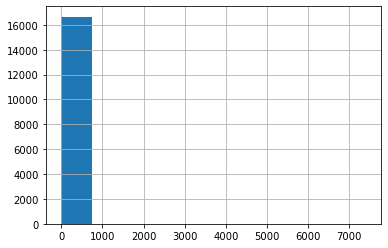

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count